In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Listings

In [ ]:
listings = pd.read_csv('listings_raw.csv')
listing_selected_columns = [
    # basic
    'id',
    'name',
    # hosts
    'host_id', 'host_response_rate', 'host_about', 'host_acceptance_rate',
    'host_is_superhost', 'host_total_listings_count','host_identity_verified',
    # house amenities
    'neighbourhood', 'room_type', 'price',
    'beds','bedrooms', 'bathrooms', 'instant_bookable',
    # reviews
    'number_of_reviews', 'reviews_per_month','review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value',
    #description
    'description'
]
listings = listings[listing_selected_columns]

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2410 non-null   int64  
 1   name                         2410 non-null   object 
 2   host_id                      2410 non-null   int64  
 3   host_response_rate           2083 non-null   object 
 4   host_about                   1461 non-null   object 
 5   host_acceptance_rate         2175 non-null   object 
 6   host_is_superhost            2363 non-null   object 
 7   host_total_listings_count    2410 non-null   int64  
 8   host_identity_verified       2410 non-null   object 
 9   neighbourhood                1495 non-null   object 
 10  room_type                    2410 non-null   object 
 11  price                        2271 non-null   object 
 12  beds                         2266 non-null   float64
 13  bedrooms          

## Handle missing values

In [ ]:
import pandas as pd
# Check for missing values
listings = listings[listings.isnull().sum(axis=1) <= 5]  # Keep rows with <= 5 missing values
# Display columns with missing values
missing_counts = listings.isnull().sum()
print(missing_counts[missing_counts > 0])

host_response_rate      216
host_about              716
host_acceptance_rate    126
host_is_superhost        39
neighbourhood           595
price                   111
beds                    112
bedrooms                 18
bathrooms               111
review_scores_value       1
description              31
dtype: int64


In [ ]:
# print(listings.dtypes)
# Identify numerical and object columns
numerical_cols = listings.select_dtypes(include=['number']).columns
object_cols = listings.select_dtypes(include=['object']).columns

# Fill numerical columns with np.nan
listings[numerical_cols] = listings[numerical_cols].fillna(np.nan)

# Fill object columns with 'NA'
listings[object_cols] = listings[object_cols].fillna('NA')


In [ ]:
# Verify numerical columns
print(listings[numerical_cols].isnull().sum())

# Verify object columns
print(listings[object_cols].apply(lambda col: (col == 'NA').sum()))

id                               0
host_id                          0
host_total_listings_count        0
beds                           112
bedrooms                        18
bathrooms                      111
number_of_reviews                0
reviews_per_month                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              1
dtype: int64
name                        0
host_response_rate        216
host_about                716
host_acceptance_rate      126
host_is_superhost          39
host_identity_verified      0
neighbourhood             595
room_type                   0
price                     111
instant_bookable            0
description                31
dtype: int64


## Handle percentage to decimal

In [ ]:
# Remove '%' and convert to decimal
listings['host_response_rate'] = listings['host_response_rate'].replace('NA', np.nan)
listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%').astype(float) / 100

listings['host_acceptance_rate'] = listings['host_acceptance_rate'].replace('NA', np.nan)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.rstrip('%').astype(float) / 100

listings.head()

,id,name,host_id,host_response_rate,host_about,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,description
0,3083,Room #2 - West Oakland,3518,1.0,"Hello! I am Traci, an artist and activist who ...",1.00,t,7,t,Neighborhood highlights,...,63,0.52,4.75,4.78,4.67,4.87,4.89,4.59,4.70,Room #2 has a lovely accent blue wall and cozy...
1,5739,Mod Studio,9276,1.0,We are a conscientious couple and will take go...,1.00,t,2,t,Neighborhood highlights,...,326,1.79,4.97,4.97,4.97,4.97,4.98,4.92,4.92,"The Mod Studio is a cozy, clean and convenient..."
2,24916,Studio w/garden and Patio close to Rockridge,98716,0.9,I have lived in this area my whole life and re...,1.00,f,4,t,Neighborhood highlights,...,140,0.82,4.53,4.57,4.49,4.80,4.71,4.83,4.55,Studio with patio garden just out the door. <...
3,29521,Sunny Rockridge Home,124220,1.0,I am a bi-coastal singer-songwriter who also w...,0.88,f,4,t,Neighborhood highlights,...,38,0.24,4.65,4.76,4.58,4.71,4.84,4.95,4.74,"Lovely, light-filled, upper level 2BD/1 BA Que..."
4,36702,North Oakland craftsman bungalow,119361,1.0,We are both chefs. We are excited to travel to...,0.33,f,1,t,Neighborhood highlights,...,39,0.23,4.90,4.95,4.95,5.00,4.97,4.79,4.84,Our home is a 1914 Craftsman Bungalow in prist...


## Handle boolean

In [ ]:
# Map 'T' to 1 and 'F' to 0
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': 1, 'f': 0})
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': 1, 'f': 0})
listings['instant_bookable'] = listings['instant_bookable'].map({'t': 1, 'f': 0})

## Handle price

In [ ]:
# Remove '$' and 'NA', convert 'NA' to NaN
listings['price'] = listings['price'].replace('NA', np.nan)  # Replace 'NA' with NaN
listings['price'] = listings['price'].str.replace('$', '', regex=False)  # Remove dollar sign

# Convert the column to numeric (float), coercing errors to NaN
listings['price'] = pd.to_numeric(listings['price'], errors='coerce')

## Handle room type

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
# Entire home/apt = 0, Private = 1, Shared = 2
listings['room_type_encoded'] = label_encoder.fit_transform(listings['room_type'])

# Load Reviews

In [ ]:
reviews = pd.read_csv('reviews_raw.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123088 entries, 0 to 123087
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     123088 non-null  int64 
 1   id             123088 non-null  int64 
 2   date           123088 non-null  object
 3   reviewer_id    123088 non-null  int64 
 4   reviewer_name  123088 non-null  object
 5   comments       123067 non-null  object
dtypes: int64(3), object(3)
memory usage: 5.6+ MB


## sentiment analysis on review comments

In [ ]:
import re

# Function to clean text
def clean_text(text):
    if isinstance(text, str):  # Ensure the text is not NaN
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
        text = text.lower()  # Convert to lowercase
        return text.strip()
    return text

# Apply cleaning to comments
reviews['cleaned_comments'] = reviews['comments'].apply(clean_text)

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    if isinstance(text, str):  # Ensure the text is not NaN
        analysis = TextBlob(text)
        return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)
    return None

# Apply sentiment analysis
reviews['sentiment_score'] = reviews['cleaned_comments'].apply(get_sentiment)

# Classify the sentiment as positive, neutral, or negative
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

reviews['sentiment'] = reviews['sentiment_score'].apply(classify_sentiment)


## Get average sentiment score for each listing

In [ ]:
# Group by listing_id and calculate the average sentiment score
average_sentiment_per_listing = reviews.groupby('listing_id')['sentiment_score'].mean().reset_index()

# Rename columns for clarity
average_sentiment_per_listing.columns = ['id', 'average_sentiment_score']
average_sentiment_per_listing.head()

,id,average_sentiment_score
0,3083,0.420057
1,5739,0.408357
2,24916,0.369167
3,29521,0.468263
4,36702,0.407203


# Merge listings with average comment sentiment score

In [ ]:
# Merge the data on 'listing_id'
merged_listings = pd.merge(listings, average_sentiment_per_listing, on='id', how='left')
merged_listings.head()

,id,name,host_id,host_response_rate,host_about,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,description,room_type_encoded,average_sentiment_score
0,3083,Room #2 - West Oakland,3518,1.0,"Hello! I am Traci, an artist and activist who ...",1.00,1.0,7,1,Neighborhood highlights,...,4.75,4.78,4.67,4.87,4.89,4.59,4.70,Room #2 has a lovely accent blue wall and cozy...,1,0.420057
1,5739,Mod Studio,9276,1.0,We are a conscientious couple and will take go...,1.00,1.0,2,1,Neighborhood highlights,...,4.97,4.97,4.97,4.97,4.98,4.92,4.92,"The Mod Studio is a cozy, clean and convenient...",0,0.408357
2,24916,Studio w/garden and Patio close to Rockridge,98716,0.9,I have lived in this area my whole life and re...,1.00,0.0,4,1,Neighborhood highlights,...,4.53,4.57,4.49,4.80,4.71,4.83,4.55,Studio with patio garden just out the door. <...,0,0.369167
3,29521,Sunny Rockridge Home,124220,1.0,I am a bi-coastal singer-songwriter who also w...,0.88,0.0,4,1,Neighborhood highlights,...,4.65,4.76,4.58,4.71,4.84,4.95,4.74,"Lovely, light-filled, upper level 2BD/1 BA Que...",0,0.468263
4,36702,North Oakland craftsman bungalow,119361,1.0,We are both chefs. We are excited to travel to...,0.33,0.0,1,1,Neighborhood highlights,...,4.90,4.95,4.95,5.00,4.97,4.79,4.84,Our home is a 1914 Craftsman Bungalow in prist...,0,0.407203


# Data split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% testing
train_df, test_df = train_test_split(merged_listings, test_size=0.3, random_state=2024)

# Check the sizes of the resulting datasets
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

# Optionally: Save the datasets to CSV
train_df.to_csv('train_listings.csv', index=False)
test_df.to_csv('test_listings.csv', index=False)

# Inspect the first few rows of the training set
print(train_df.head())

Training set size: 1387
Testing set size: 595
                      id                                               name  \
1673  923348734615976700                       Room with Attached bathroom.   
783             40383904  2 Bedrooms in Shared Cozy House Mills College ...   
1418  724675060534630675             Modern Luxe Loft | Wi-Fi, Gym, Balcony   
314             14523590        Charming spacious Condo close to SF Oakland   
1534  827625646164232196      SF Bay Area Brand new 2bed/2bath condo w/ AC!   

        host_id  host_response_rate  \
1673  349564604                 0.2   
783   191425128                 NaN   
1418  481151196                 1.0   
314    17381741                 NaN   
1534  501245705                 0.8   

                                             host_about  host_acceptance_rate  \
1673                                          I am nice                  0.60   
783                                                  NA                   NaN   
1

# Changing HTML Text to Plain Text

In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
def clean_html_text(html_text):
    # Convert HTML to plain text using BeautifulSoup
    soup = BeautifulSoup(html_text, 'html.parser')
    text = soup.get_text()

    # Remove <br /> tags and replace with space
    text = re.sub(r'<br\s*/>', ' ', text)

    # Remove newlines and tabs
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\t', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove any remaining HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    return text.strip()

In [ ]:
train_df['description'] = train_df['description'].apply(clean_html_text)
test_df['description'] = test_df['description'].apply(clean_html_text)

# Basic Text Cleaning and Merging into a single Text data

## Change to Lower Case, Remove puncuation, digits

In [ ]:
#Change to Lowercase
train_df[['description', 'name', 'host_about']] = train_df[['description', 'name', 'host_about']].applymap(str.lower)
test_df[['description', 'name', 'host_about']] = test_df[['description', 'name', 'host_about']].applymap(str.lower)

In [ ]:
# Remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

train_df[['description', 'name', 'host_about']] = train_df[['description', 'name', 'host_about']].applymap(remove_punctuation)
test_df[['description', 'name', 'host_about']] = test_df[['description', 'name', 'host_about']].applymap(remove_punctuation)

In [ ]:
# Remove digits
def remove_digit(text):
    return re.sub(r'\d+', '', text)

train_df[['description', 'name', 'host_about']] = train_df[['description', 'name', 'host_about']].applymap(remove_digit)
test_df[['description', 'name', 'host_about']] = test_df[['description', 'name', 'host_about']].applymap(remove_digit)

## Tokenization and Remove Stopwords and do stemming

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/liujiatong/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    return word_tokenize(text)

train_df[['description', 'name', 'host_about']] = train_df[['description', 'name', 'host_about']].applymap(tokenize_text)
test_df[['description', 'name', 'host_about']] = test_df[['description', 'name', 'host_about']].applymap(tokenize_text)

In [ ]:
from nltk.corpus import stopwords
# Remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

train_df[['description', 'name', 'host_about']] = train_df[['description', 'name', 'host_about']].applymap(remove_stopwords)
test_df[['description', 'name', 'host_about']] = test_df[['description', 'name', 'host_about']].applymap(remove_stopwords)

In [ ]:
from nltk.stem import PorterStemmer
#We use porter stemming
porter = PorterStemmer()

def stemmer(tokens):
    return [porter.stem(word) for word in tokens]

train_df[['description', 'name', 'host_about']] = train_df[['description', 'name', 'host_about']].applymap(stemmer)
test_df[['description', 'name', 'host_about']] = test_df[['description', 'name', 'host_about']].applymap(stemmer)

# Let's check our DataFrame

In [ ]:
train_df.head()

,id,name,host_id,host_response_rate,host_about,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,description,room_type_encoded,average_sentiment_score
1673,923348734615976700,"[room, attach, bathroom]",349564604,0.2,[nice],0.60,0.0,4,1,NA,...,2.00,2.00,3.0,4.00,2.00,5.00,2.00,"[ivi, hill, coliv, design, peopl, go, everyth,...",1,-0.014375
783,40383904,"[bedroom, share, cozi, hous, mill, colleg, area]",191425128,NaN,[na],NaN,0.0,4,1,NA,...,4.38,4.38,4.5,4.50,4.38,4.38,4.38,"[welcom, havenscourt, oakland, fast, access, b...",1,0.411104
1418,724675060534630675,"[modern, lux, loft, wifi, gym, balconi]",481151196,1.0,"[bay, area, nativ, love, tri, new, food, meet,...",0.90,1.0,2,1,Neighborhood highlights,...,5.00,5.00,5.0,5.00,5.00,5.00,5.00,"[experi, oakland, modern, lux, midris, great, ...",0,0.359875
314,14523590,"[charm, spaciou, condo, close, sf, oakland]",17381741,NaN,"[athlet, softwar, profession, enjoy, cycl, gre...",0.96,1.0,2,0,Neighborhood highlights,...,4.74,4.80,4.8,4.92,4.89,4.21,4.76,"[charm, privat, bedroom, bath, apart, top, sec...",0,0.351587
1534,827625646164232196,"[sf, bay, area, brand, new, bedbath, condo, w,...",501245705,0.8,[na],0.00,0.0,1,1,NA,...,5.00,5.00,5.0,5.00,5.00,5.00,5.00,"[enjoy, stylish, experi, centrallyloc, place, ...",0,0.300000


## Treat Three text data independently and merge into one column

In [ ]:
# Step 1: Define functions to add prefixes and handle both string and list inputs
def add_description(document):
    if isinstance(document, str):
        return ['desc_' + document]
    elif isinstance(document, list):
        return ['desc_' + token for token in document]
    return []

def add_name(document):
    if isinstance(document, str):
        return ['name_' + document]
    elif isinstance(document, list):
        return ['name_' + token for token in document]
    return []

def add_host_about(document):
    if isinstance(document, str):
        return ['host_' + document]
    elif isinstance(document, list):
        return ['host_' + token for token in document]
    return []

# Step 2: Apply the functions to respective columns
train_df['description'] = train_df['description'].apply(add_description)
train_df['name'] = train_df['name'].apply(add_name)
train_df['host_about'] = train_df['host_about'].apply(add_host_about)

test_df['description'] = test_df['description'].apply(add_description)
test_df['name'] = test_df['name'].apply(add_name)
test_df['host_about'] = test_df['host_about'].apply(add_host_about)

# Step 3: Merge the columns - using list concatenation
def combine_text_columns(row):
    # Ensure each element is a list before combining
    desc = row['description'] if isinstance(row['description'], list) else []
    name = row['name'] if isinstance(row['name'], list) else []
    host = row['host_about'] if isinstance(row['host_about'], list) else []
    return desc + name + host

train_df['text'] = train_df.apply(combine_text_columns, axis=1)
test_df['text'] = test_df.apply(combine_text_columns, axis=1)

## Detokenize and convert to document term matrices

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer

# First, join the list elements into a string
text_train = train_df['text'].apply(lambda x: ' '.join(x))

# Now we can apply the TreebankWordDetokenizer
text_train = text_train.apply(lambda x: TreebankWordDetokenizer().detokenize(x.split()))

# Initialize and fit CountVectorizer
countvec_train = CountVectorizer(max_features=5000)
sparse_dtm_train = countvec_train.fit_transform(text_train)

# Do the same for test data
text_test = test_df['text'].apply(lambda x: ' '.join(x))
text_test = text_test.apply(lambda x: TreebankWordDetokenizer().detokenize(x.split()))
sparse_dtm_test = countvec_train.transform(text_test)

# Convert sparse matrices to pandas DataFrames
dtm_train = pd.DataFrame(
    sparse_dtm_train.toarray(),
    columns=countvec_train.get_feature_names_out(),
    index=train_df.index
)

dtm_test = pd.DataFrame(
    sparse_dtm_test.toarray(),
    columns=countvec_train.get_feature_names_out(),
    index=test_df.index
)

In [ ]:
dtm_train.head(5)

,desc_abl,desc_abod,desc_abroad,desc_absolut,desc_abund,desc_ac,desc_accent,desc_accept,desc_access,desc_acclaim,...,name_wsuit,name_wview,name_xlarg,name_yard,name_young,name_yurt,name_zen,name_zone,name_zoo,name_及
1673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Change dependent variable to binary variable

In [ ]:
# Create binary target variable (1 if score >= 4.5, 0 otherwise)
percentile_threshold = 50
threshold_value = np.percentile(train_df['review_scores_rating'], percentile_threshold)

y_train = (train_df['review_scores_rating'] >= threshold_value).astype(int)
y_test = (test_df['review_scores_rating'] >= threshold_value).astype(int)

"""# Create binary target variable (1 if score >= 4.5, 0 otherwise)
y_train = (train_df['review_scores_rating'] >= 4.7).astype(int)
y_test = (test_df['review_scores_rating'] >= 4.7).astype(int)"""

# Define the percentile threshold (e.g., 90th percentile)
percentile_threshold = 50
# check in excel =COUNTIF(BK:BK,5) // 534
# =COUNTIFS(BK:BK, ">=4.89", BK:BK, "<=5.0") // 1022
# =COUNTIFS(BK:BK, "<=4.89") // 1014

# Calculate the threshold value for `review_scores_rating`
threshold_value = np.percentile(train_df['review_scores_rating'], percentile_threshold)
print(threshold_value)

# Create binary labels based on the percentile threshold
y_train = (train_df['review_scores_rating'] >= threshold_value).astype(int)
y_test = (test_df['review_scores_rating'] >= threshold_value).astype(int)


4.89


In [ ]:
#Add y_train and y_test to your data frame if it is needed. Drop unnecessary columns
train_df['useful'] = y_train
test_df['useful'] = y_test

In [ ]:
train_df.head()

,id,name,host_id,host_response_rate,host_about,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,description,room_type_encoded,average_sentiment_score,text,useful
1673,923348734615976700,"[name_room, name_attach, name_bathroom]",349564604,0.2,[host_nice],0.60,0.0,4,1,NA,...,3.0,4.00,2.00,5.00,2.00,"[desc_ivi, desc_hill, desc_coliv, desc_design,...",1,-0.014375,"[desc_ivi, desc_hill, desc_coliv, desc_design,...",0
783,40383904,"[name_bedroom, name_share, name_cozi, name_hou...",191425128,NaN,[host_na],NaN,0.0,4,1,NA,...,4.5,4.50,4.38,4.38,4.38,"[desc_welcom, desc_havenscourt, desc_oakland, ...",1,0.411104,"[desc_welcom, desc_havenscourt, desc_oakland, ...",0
1418,724675060534630675,"[name_modern, name_lux, name_loft, name_wifi, ...",481151196,1.0,"[host_bay, host_area, host_nativ, host_love, h...",0.90,1.0,2,1,Neighborhood highlights,...,5.0,5.00,5.00,5.00,5.00,"[desc_experi, desc_oakland, desc_modern, desc_...",0,0.359875,"[desc_experi, desc_oakland, desc_modern, desc_...",1
314,14523590,"[name_charm, name_spaciou, name_condo, name_cl...",17381741,NaN,"[host_athlet, host_softwar, host_profession, h...",0.96,1.0,2,0,Neighborhood highlights,...,4.8,4.92,4.89,4.21,4.76,"[desc_charm, desc_privat, desc_bedroom, desc_b...",0,0.351587,"[desc_charm, desc_privat, desc_bedroom, desc_b...",0
1534,827625646164232196,"[name_sf, name_bay, name_area, name_brand, nam...",501245705,0.8,[host_na],0.00,0.0,1,1,NA,...,5.0,5.00,5.00,5.00,5.00,"[desc_enjoy, desc_stylish, desc_experi, desc_c...",0,0.300000,"[desc_enjoy, desc_stylish, desc_experi, desc_c...",1


# Build and evaluate models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings

In [ ]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    tpr = recall_score(y_true, y_pred, average='binary') # TPR
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fpr = fp / (fp + tn) # False Positive Rate
    return acc, tpr, fpr, precision

In [ ]:
# Baseline model (predict majority class)
baseline_pred = [1 if sum(y_train) > len(y_train)/2 else 0] * len(y_test)
baseline_acc, baseline_TPR, baseline_FPR, baseline_PRE = calculate_metrics(y_test, baseline_pred)

In [ ]:
# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(dtm_train, y_train)
lr_pred = lr_model.predict(dtm_test)
log_acc, log_TPR, log_FPR, log_PRE = calculate_metrics(y_test, lr_pred)

In [ ]:
# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
dt_cv = GridSearchCV(dt_model, dt_params, cv=5)
dt_cv.fit(dtm_train, y_train)
dtc_pred = dt_cv.predict(dtm_test)
dtc_acc, dtc_TPR, dtc_FPR, dtc_PRE = calculate_metrics(y_test, dtc_pred)

In [ ]:
# 3. Random Forest with CV
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}
rf_cv = GridSearchCV(rf_model, rf_params, cv=5)
rf_cv.fit(dtm_train, y_train)
rf_pred = rf_cv.predict(dtm_test)
rf_acc, rf_TPR, rf_FPR, rf_PRE = calculate_metrics(y_test, rf_pred)

In [ ]:
# 4. Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(dtm_train, y_train)
lda_pred = lda_model.predict(dtm_test)
lda_acc, lda_TPR, lda_FPR, lda_PRE = calculate_metrics(y_test, lda_pred)

In [ ]:
#Create Comparison Table
#These lines are provided for you to help construct a comparison table.
#It is not requred to follow this format. + You need to find ACC, TPR, FPR, PRE for each model that you choose.
comparison_data = {'Baseline':[baseline_acc,baseline_TPR,baseline_FPR, baseline_PRE],
                   'Logistic Regression':[log_acc,log_TPR,log_FPR, log_PRE],
                   'Decision Tree Classifier':[dtc_acc,dtc_TPR,dtc_FPR,dtc_PRE],
                   'Random Forest with CV':[rf_acc,rf_TPR, rf_FPR,rf_PRE],
                  'Linear Discriminant Analysis':[lda_acc,lda_TPR, lda_FPR,lda_PRE]}

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR','PRE']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

,Accuracy,TPR,FPR,PRE
Baseline,0.521008,1.000000,1.000000,0.521008
Logistic Regression,0.630252,0.629032,0.368421,0.650000
Decision Tree Classifier,0.579832,0.377419,0.200000,0.672414
Random Forest with CV,0.630252,0.738710,0.487719,0.622283
Linear Discriminant Analysis,0.561345,0.554839,0.431579,0.583051


In [ ]:
from tqdm import tqdm
import time
from sklearn.utils import resample
import numpy as np
import pandas as pd

# Initialize metrics dictionary
metrics = {'Accuracy': [], 'TPR': [], 'FPR': [], 'PRE': []}

# Number of bootstrap samples
n_bootstraps = 1000

def calculate_metrics(y_true, y_pred):
    """Calculate performance metrics"""
    # Accuracy
    acc = np.mean(y_true == y_pred)

    # True Positive Rate (Sensitivity/Recall)
    tpr = np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_true == 1)

    # False Positive Rate
    fpr = np.sum((y_true == 0) & (y_pred == 1)) / np.sum(y_true == 0)

    # Precision
    pre = np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_pred == 1)

    return acc, tpr, fpr, pre

# Bootstrapping with Progress Bar
for i in tqdm(range(n_bootstraps), desc="Bootstrapping Progress"):
    # Resample training data with replacement
    X_boot, y_boot = resample(dtm_test, y_test, random_state=2024 + i)

    # Predict on the bootstrap test set
    y_pred = rf_cv.predict(X_boot)

    # Calculate metrics
    acc, tpr, fpr, pre = calculate_metrics(y_boot, y_pred)
    metrics['Accuracy'].append(acc)
    metrics['TPR'].append(tpr)
    metrics['FPR'].append(fpr)
    metrics['PRE'].append(pre)

# Summarize results
for metric, values in metrics.items():
    print(f"{metric}: Mean = {np.mean(values):.4f}, 95% CI = ({np.percentile(values, 2.5):.4f}, {np.percentile(values, 97.5):.4f})")

Bootstrapping Progress: 100%|██████████| 1000/1000 [00:22<00:00, 45.04it/s]

Accuracy: Mean = 0.6304, 95% CI = (0.5916, 0.6672)
TPR: Mean = 0.7395, 95% CI = (0.6913, 0.7885)
FPR: Mean = 0.4883, 95% CI = (0.4330, 0.5458)
PRE: Mean = 0.6223, 95% CI = (0.5722, 0.6720)


In [ ]:
# Parameters
window_size = 20  # Number of listings per window
listing_probas = rf_cv.predict_proba(dtm_test)[:, 1]  # Probabilities for high-performing listings

# Calculate total number of complete windows
num_windows = len(y_test) // window_size

# Create windows
windows = [
    (y_test[i * window_size:(i + 1) * window_size],
     listing_probas[i * window_size:(i + 1) * window_size])
    for i in range(num_windows)
]

# Initialize results
baseline_top_listing_probs = []
model_top_listing_probs = []

# Process each window
for y_true_window, y_pred_proba_window in windows:
    # Convert to DataFrame for easier handling
    window_df = pd.DataFrame({
        'y_true': y_true_window,
        'y_pred_proba': y_pred_proba_window
    })

    # Baseline: Random selection within the window
    baseline_top_listing_prob = window_df['y_true'].mean()
    baseline_top_listing_probs.append(baseline_top_listing_prob)

    # Model-based sorting (selecting highest probability listings)
    window_sorted = window_df.sort_values(by='y_pred_proba', ascending=False)
    model_top_listing_prob = window_sorted.iloc[0]['y_true']
    model_top_listing_probs.append(model_top_listing_prob)

# Calculate improvements
baseline_mean_prob = np.mean(baseline_top_listing_probs)
model_mean_prob = np.mean(model_top_listing_probs)
improvement = model_mean_prob - baseline_mean_prob

# Print results
print(f"Baseline Mean Probability (Top Listing High-Performing): {baseline_mean_prob*100:.2f}%")
print(f"Model Mean Probability (Top Listing High-Performing): {model_mean_prob*100:.2f}%")
print(f"Improvement in Probability: {improvement*100:.2f}%")

# Additional analysis: Price vs Performance relationship
top_listings_df = pd.DataFrame({
    'actual_performance': y_test,
    'predicted_probability': listing_probas,
    'price': test_df['price']  # Assuming price column exists
})

# Sort by predicted probability
top_listings_df = top_listings_df.sort_values('predicted_probability', ascending=False)

# Analyze top 10% of listings
top_10_percent = top_listings_df.head(int(len(top_listings_df) * 0.1))
print("\nAnalysis of Top 10% Predicted High-Performing Listings:")
print(f"Average Price: ${top_10_percent['price'].mean():.2f}")
print(f"Actual High-Performance Rate: {(top_10_percent['actual_performance'].mean()*100):.2f}%")

Baseline Mean Probability (Top Listing High-Performing): 52.24%
Model Mean Probability (Top Listing High-Performing): 58.62%
Improvement in Probability: 6.38%

Analysis of Top 10% Predicted High-Performing Listings:
Average Price: $140.42
Actual High-Performance Rate: 67.80%


## Linear Regression for Analyzing the Significant Factors to 'review_scores_value'

In [ ]:
# Remove unnecessary columns including 'description' and target variable
X_train = train_df.drop(columns=['description','host_id', 'average_sentiment_score', 'neighbourhood','name', 'id', 'text', 'host_about',
       'useful','review_scores_value'])
y_train = train_df['review_scores_value']

X_test = test_df.drop(columns=['description', 'host_id', 'average_sentiment_score', 'neighbourhood','name', 'id', 'text', 'host_about',
       'useful','review_scores_value'])
y_test = test_df['review_scores_value']

# Align test set columns with training set columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
# X_train.columns

In [ ]:
import statsmodels.formula.api as smf

# Prepare the data for statsmodels: ensure column names are compatible
X_train_sm = X_train.copy()
X_train_sm.columns = [col.replace(" ", "_") for col in X_train.columns]

# Add the target variable
train_data_sm = X_train_sm.copy()
train_data_sm['review_scores_value'] = y_train

# Define the formula for linear regression
formula = "review_scores_value ~ " + " + ".join(X_train_sm.columns)

# Set up and fit the linear regression model
lin_reg_model = smf.ols(formula, data=train_data_sm)
lin_reg = lin_reg_model.fit()

# Output the summary of the linear regression model
print(lin_reg.summary())

                             OLS Regression Results                            
Dep. Variable:     review_scores_value   R-squared:                       0.795
Model:                             OLS   Adj. R-squared:                  0.791
Method:                  Least Squares   F-statistic:                     213.4
Date:                 Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                         23:58:23   Log-Likelihood:                 394.53
No. Observations:                 1122   AIC:                            -747.1
Df Residuals:                     1101   BIC:                            -641.6
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercep

### Analysis of OLS Regression Results

---

### **Overall Model Analysis**
- **R-squared**: 0.795  
  The model explains approximately 79.5% of the variance in Airbnb review scores, indicating a good fit.  
- **Adjusted R-squared**: 0.791  
  The adjusted R² shows that the model remains robust even after accounting for the number of predictors.  
- **Prob(F-statistic)**: 0.00  
  The model is statistically significant as a whole.

---

### **Significant Variables (P-value < 0.05)**

1. **`host_response_rate` (Positive correlation)**  
   - Coefficient: 0.1309  
   - Higher response rates lead to higher review scores.  
   - **Insight**: Prompt communication from hosts positively impacts guest satisfaction.

2. **`host_acceptance_rate` (Negative correlation)**  
   - Coefficient: -0.0965  
   - Higher acceptance rates are associated with slightly lower scores.  
   - **Insight**: This could indicate underlying service quality issues needing further investigation.

3. **`price` (Negative correlation)**  
   - Coefficient: -0.0002  
   - Higher prices slightly reduce review scores.  
   - **Insight**: Guests may have higher expectations at higher prices, leading to lower satisfaction if expectations are unmet.

4. **`reviews_per_month` (Positive correlation)**  
   - Coefficient: 0.0128  
   - More frequent reviews correlate with higher scores.  
   - **Insight**: Frequent reviews could indicate consistent service quality.

5. **`review_scores_rating` (Positive correlation)**  
   - Coefficient: 0.5034  
   - Other review scores significantly influence the overall review score.  

6. **`review_scores_accuracy` (Positive correlation)**  
   - Coefficient: 0.2466  
   - Accuracy of listings significantly affects review scores.  

7. **`review_scores_checkin` (Negative correlation)**  
   - Coefficient: -0.1124  
   - Poor check-in experiences significantly lower scores.  

8. **`review_scores_communication` (Positive correlation)**  
   - Coefficient: 0.2898  
   - Communication ratings strongly impact the overall review score.  

9. **`review_scores_location` (Positive correlation)**  
   - Coefficient: 0.0920  
   - Location ratings positively influence review scores.  

10. **`room_type_encoded` (Positive correlation)**  
    - Coefficient: 0.4044  
    - Different room types significantly affect review scores.

---

### **Non-Significant Variables (P-value > 0.05)**

- **`host_is_superhost`**  
  - Superhost status has no direct impact on review scores.  
- **`instant_bookable`**  
  - The availability of instant booking does not significantly affect review scores.

### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

# Function to calculate VIF
def VIF(df, columns):
    # Add intercept (constant) term
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns) + 1  # Include the intercept
    # Calculate VIF for each column
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)  # Exclude the intercept VIF

# Prepare the columns and handle non-numeric data
cols = X_train_sm.select_dtypes(include=['number']).columns.tolist()  # Select only numeric columns
train_data_numeric = train_data_sm[cols].fillna(train_data_sm[cols].mean())  # Fill missing values with the mean

# Calculate VIF
vif_values = VIF(train_data_numeric, cols)

# Output the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_values)

Variance Inflation Factor (VIF):
host_response_rate             1.350257
host_acceptance_rate           1.443093
host_is_superhost              1.183272
host_total_listings_count      1.118165
host_identity_verified         1.024877
price                          1.911903
beds                           1.717575
bedrooms                       2.212966
bathrooms                      1.457715
instant_bookable               1.119416
number_of_reviews              1.933568
reviews_per_month              2.024694
review_scores_rating           4.723319
review_scores_accuracy         3.812498
review_scores_cleanliness      2.130957
review_scores_checkin          2.580124
review_scores_communication    3.622410
review_scores_location         1.627862
room_type_encoded              1.240444
dtype: float64


### Refit the Model

In [ ]:
# Iteratively remove variables with high VIF and refit the model
cols_reduced = [col for col in cols if col not in ['host_is_superhost','instant_bookable','host_total_listings_count','review_scores_rating']]

# Recalculate VIF
vif_values_reduced = VIF(train_data_numeric, cols_reduced)

# Refit the model with reduced variables
formula_reduced = "review_scores_value ~ " + " + ".join(cols_reduced)
reduced_model = smf.ols(formula=formula_reduced, data=train_data_sm).fit()

# Output updated VIF and model summary
print("Reduced VIF:")
print(vif_values_reduced)
print("\nReduced Model Summary:")
print(reduced_model.summary())

Reduced VIF:
host_response_rate             1.339249
host_acceptance_rate           1.381890
host_identity_verified         1.021265
price                          1.901601
beds                           1.705542
bedrooms                       2.181155
bathrooms                      1.442613
number_of_reviews              1.900210
reviews_per_month              1.999201
review_scores_accuracy         3.423786
review_scores_cleanliness      1.951778
review_scores_checkin          2.566153
review_scores_communication    2.780232
review_scores_location         1.492647
room_type_encoded              1.224516
dtype: float64

Reduced Model Summary:
                             OLS Regression Results                            
Dep. Variable:     review_scores_value   R-squared:                       0.744
Model:                             OLS   Adj. R-squared:                  0.741
Method:                  Least Squares   F-statistic:                     219.9
Date:                 Mon, 0

In [ ]:
# Iteratively remove variables with high VIF and refit the model
cols_reduced = [col for col in cols if col not in ['beds','bathrooms','number_of_reviews']]

# Recalculate VIF
vif_values_reduced = VIF(train_data_numeric, cols_reduced)

# Refit the model with reduced variables
formula_reduced = "review_scores_value ~ " + " + ".join(cols_reduced)
reduced_model = smf.ols(formula=formula_reduced, data=train_data_sm).fit()

# Output updated VIF and model summary
print("Reduced VIF:")
print(vif_values_reduced)
print("\nReduced Model Summary:")
print(reduced_model.summary())

Reduced VIF:
host_response_rate             1.346469
host_acceptance_rate           1.440361
host_is_superhost              1.158189
host_total_listings_count      1.117906
host_identity_verified         1.024637
price                          1.713697
bedrooms                       1.663114
instant_bookable               1.116413
reviews_per_month              1.188328
review_scores_rating           4.672625
review_scores_accuracy         3.799195
review_scores_cleanliness      2.129138
review_scores_checkin          2.575903
review_scores_communication    3.608075
review_scores_location         1.608276
room_type_encoded              1.185513
dtype: float64

Reduced Model Summary:
                             OLS Regression Results                            
Dep. Variable:     review_scores_value   R-squared:                       0.794
Model:                             OLS   Adj. R-squared:                  0.791
Method:                  Least Squares   F-statistic:               

## Logistic Regression for Analyzing the Significant Factors to 'review_scores_value'

In [ ]:
# Create binary target variable (1 if score >= 4.89, 0 otherwise)
y_train = (train_df['review_scores_rating'] >= 4.89).astype(int)
y_test = (test_df['review_scores_rating'] >= 4.89).astype(int)

In [ ]:
#Add y_train and y_test to your data frame if it is needed. Drop unnecessary columns
train_df['useful'] = y_train
test_df['useful'] = y_test

In [ ]:
import statsmodels.formula.api as smf

formula = "useful ~ host_response_rate + host_acceptance_rate + host_is_superhost + host_total_listings_count + price + beds + bedrooms + bathrooms + instant_bookable + number_of_reviews + reviews_per_month + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + room_type_encoded"

logreg_model = smf.logit(formula, data=train_df)
logreg = logreg_model.fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.424469
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 useful   No. Observations:                 1122
Model:                          Logit   Df Residuals:                     1103
Method:                           MLE   Df Model:                           18
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.3871
Time:                        23:58:24   Log-Likelihood:                -476.25
converged:                       True   LL-Null:                       -777.00
Covariance Type:            nonrobust   LLR p-value:                4.174e-116
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -70.3020      5.855    -12.007      0.000   

### Logistic Regression Results Analysis

#### Overall Model Performance
- **Pseudo R-squared**: 0.3871  
  - Indicates that the model explains 38.71% of the variance in the binary target variable (`useful`).

---

#### Key Variable Analysis
1. **Significant Variables (P < 0.05)**:
   - **`review_scores_accuracy` (P = 0.000)**:
     - Coefficient: 5.7244 (positive).
     - Strongly associated with higher likelihood of `useful = 1`. Accuracy in reviews is a key factor influencing ratings.
   - **`review_scores_cleanliness` (P = 0.000)**:
     - Coefficient: 2.0453 (positive).
     - Cleanliness ratings have a significant positive influence on `useful`.
   - **`review_scores_communication` (P = 0.010)**:
     - Coefficient: 2.5649 (positive).
     - Better communication is positively linked to higher ratings.
   - **`review_scores_location` (P = 0.000)**:
     - Coefficient: 1.9762 (positive).
     - Location is a strong predictor of positive reviews.
   - **`review_scores_value` (P = 0.000)**:
     - Coefficient: 4.1363 (positive).
     - Perceived value has the largest positive impact on high ratings.
   - **`review_scores_checkin` (P = 0.015)**:
     - Coefficient: -1.6770 (negative).
     - Surprisingly, better check-in scores reduce the likelihood of high ratings (`useful = 1`).
   - **`number_of_reviews` (P = 0.001)**:
     - Coefficient: -0.0032 (negative).
     - A higher number of reviews slightly decreases the probability of a high rating.

2. **Non-Significant Variables (P > 0.05)**:
   - Examples include:
     - `host_response_rate` (P = 0.350)
     - `host_acceptance_rate` (P = 0.572)
     - `host_is_superhost` (P = 0.635)
     - `host_total_listings_count` (P = 0.708)
     - `price` (P = 0.164)
     - `beds` (P = 0.197)
     - `bathrooms` (P = 0.724)
     - `instant_bookable` (P = 0.127)
     - `reviews_per_month` (P = 0.251)
     - `room_type_encoded` (P = 0.200)

### Refit the Model

In [ ]:
import statsmodels.formula.api as smf

formula = "useful ~ number_of_reviews + reviews_per_month + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value"

logreg_model = smf.logit(formula, data=train_df)
logreg = logreg_model.fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.416735
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 useful   No. Observations:                 1386
Model:                          Logit   Df Residuals:                     1377
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.3986
Time:                        23:58:24   Log-Likelihood:                -577.59
converged:                       True   LL-Null:                       -960.38
Covariance Type:            nonrobust   LLR p-value:                5.415e-160
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -81.4384      5.567    -14.630      0.000   

### Accuracy, True Positive Rate (TPR), and False Positive Rate (FPR)

In [ ]:
# Generate predictions for the test dataset
y_pred = logreg.predict(test_df)

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred_binary = (y_pred >= 0.5).astype(int)
test_df = test_df.fillna(0)

Accuracy: 0.8689075630252101
True Positive Rate (TPR): 0.8935483870967742
False Positive Rate (FPR): 0.15789473684210525


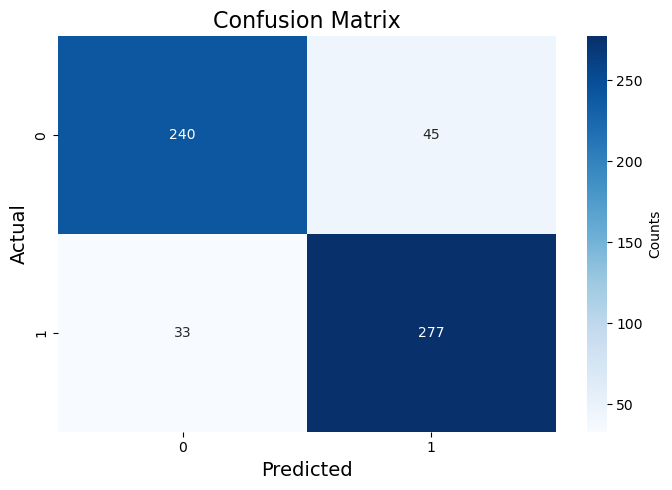

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

# Replace with your actual y_test and y_pred values from the model's predictions
y_test = test_df['useful'].values  # Ensure 'useful' column in test_df corresponds to binary true labels
y_pred_prob = logreg.predict(test_df)  # Predict probabilities on the test dataset
y_pred = (y_pred_prob >= 0.5).astype(int)  # Apply threshold to convert probabilities to binary predictions

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract metrics from confusion matrix
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
tpr = TP / (TP + FN)  # Sensitivity
fpr = FP / (FP + TN)  # Specificity

# Print metrics
print("Accuracy:", accuracy)
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Counts'})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.tight_layout()
plt.show()

### ROC

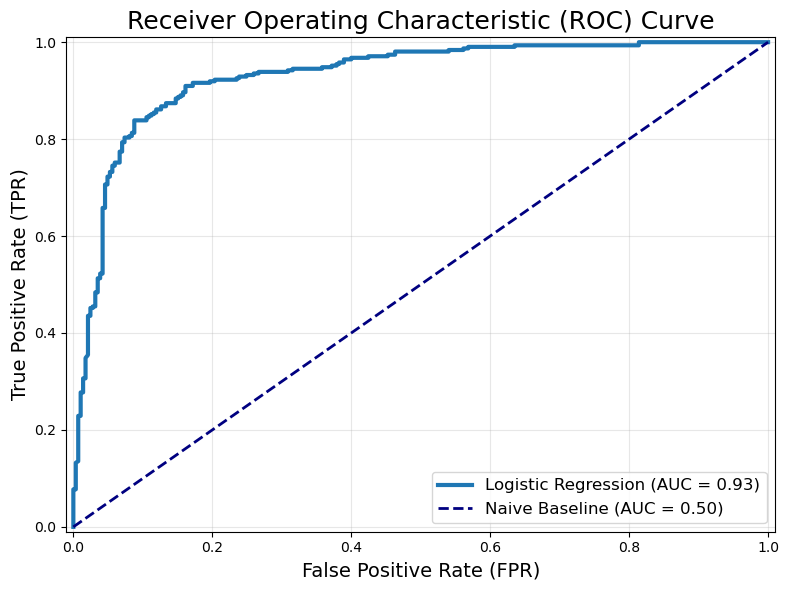

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predicted probabilities for the positive class (1)
y_prob = logreg.predict(test_df)  # Predict probabilities on the test dataset

# Ensure y_test is aligned with your test dataset
y_test = test_df['useful'].values  # Use the 'useful' column for binary true labels

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc), lw=3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Naive Baseline (AUC = 0.50)')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# CART Decision Trees

Baseline Decision Tree Classifier Performance:
Confusion Matrix:
[[168 117]
 [136 174]]
Accuracy: 0.5748
Precision: 0.5979
Recall (TPR): 0.5613
False Positive Rate (FPR): 0.4105


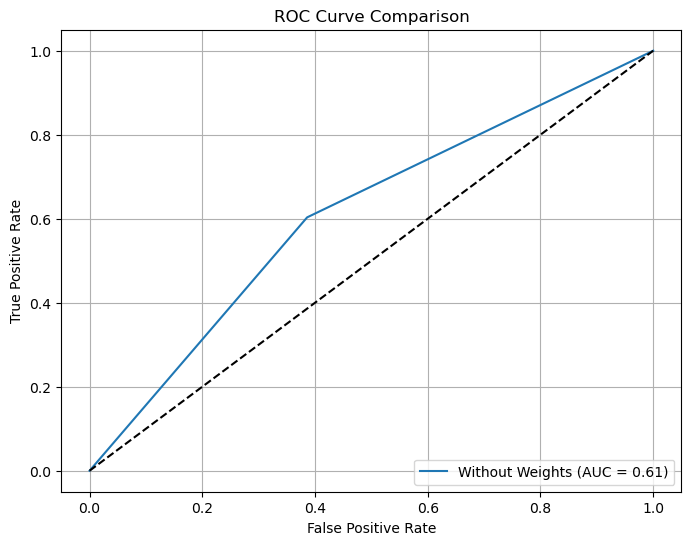

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer

# Baseline Decision Tree Classifier (DTC_Initial)
dtc_initial = DecisionTreeClassifier(
    min_samples_leaf=1,
    ccp_alpha=0.0001,
    random_state=42
)
dtc_initial.fit(dtm_train, y_train)
y_pred_initial = dtc_initial.predict(dtm_test)

# Evaluation Metrics for DTC_Initial
cm_initial = confusion_matrix(y_test, y_pred_initial)
acc_initial = accuracy_score(y_test, y_pred_initial)
precision_initial = precision_score(y_test, y_pred_initial)
recall_initial = recall_score(y_test, y_pred_initial)

TN, FP, FN, TP = cm_initial.ravel()
TPR_initial = TP / (TP + FN)
FPR_initial = FP / (FP + TN)

print("Baseline Decision Tree Classifier Performance:")
print(f"Confusion Matrix:\n{cm_initial}")
print(f"Accuracy: {acc_initial:.4f}")
print(f"Precision: {precision_initial:.4f}")
print(f"Recall (TPR): {recall_initial:.4f}")
print(f"False Positive Rate (FPR): {FPR_initial:.4f}")

# Decision Tree with Sample Weights (DTC_SampleWeight)
# Handle missing values in 'number_of_reviews' if not already handled
train_df['number_of_reviews'] = merged_listings['number_of_reviews'].fillna(0)
test_df['number_of_reviews'] = merged_listings['number_of_reviews'].fillna(0)

# Create sample weights based on 'number_of_reviews'
dtm_train['sample_weight'] = merged_listings['number_of_reviews']
dtm_test['sample_weight'] = merged_listings['number_of_reviews']

weights_train = dtm_train['sample_weight']
weights_test = dtm_test['sample_weight']

dtc_sample_weight = DecisionTreeClassifier(
    min_samples_leaf=1,
    ccp_alpha=0.0001,
    random_state=42
)
dtc_sample_weight.fit(dtm_train, y_train, sample_weight=weights_train)
y_pred_sample_weight = dtc_sample_weight.predict(dtm_test)

# ROC Curve Comparison Without and With Sample Weights
# Without Sample Weights
dtc_no_weights_roc = DecisionTreeClassifier(
    min_samples_leaf=1,
    ccp_alpha=0.0001,
    random_state=42
)
dtc_no_weights_roc.fit(dtm_train, y_train)
y_pred_proba_no_weights = dtc_no_weights_roc.predict_proba(dtm_test)[:, 1]
fpr_no_weights, tpr_no_weights, _ = roc_curve(y_test, y_pred_proba_no_weights)
roc_auc_no_weights = roc_auc_score(y_test, y_pred_proba_no_weights)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_no_weights, tpr_no_weights, label=f'Without Weights (AUC = {roc_auc_no_weights:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [ ]:
# Hyperparameter Tuning with GridSearchCV (DTC_Tuned)
# Define the parameter grid
param_grid_tuned = {
    'ccp_alpha': np.linspace(0, 0.001, 100),
    'min_samples_leaf': np.linspace(1, 20, 20).astype(int),
    'max_depth': np.linspace(1, 10, 10).astype(int)
}

grid_search_tuned = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tuned,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

grid_search_tuned.fit(dtm_train, y_train)

best_params_tuned = grid_search_tuned.best_params_
best_score_tuned = grid_search_tuned.best_score_

print(f"\nBest Parameters (Tuned): {best_params_tuned}")
print(f"Best Cross-Validation Accuracy (Tuned): {best_score_tuned:.4f}")

dtc_tuned = DecisionTreeClassifier(
    ccp_alpha=best_params_tuned['ccp_alpha'],
    min_samples_leaf=best_params_tuned['min_samples_leaf'],
    max_depth=best_params_tuned['max_depth'],
    random_state=42
)

dtc_tuned.fit(dtm_train, y_train)
y_pred_tuned = dtc_tuned.predict(dtm_test)

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
acc_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)

TN, FP, FN, TP = cm_tuned.ravel()
TPR_tuned = TP / (TP + FN)
FPR_tuned = FP / (FP + TN)

print("\nTuned Decision Tree Classifier Performance:")
print(f"Confusion Matrix:\n{cm_tuned}")
print(f"Accuracy: {acc_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall (TPR): {recall_tuned:.4f}")
print(f"False Positive Rate (FPR): {FPR_tuned:.4f}")

Fitting 5 folds for each of 20000 candidates, totalling 100000 fits

Best Parameters (Tuned): {'ccp_alpha': 0.00013131313131313133, 'max_depth': 9, 'min_samples_leaf': 16}
Best Cross-Validation Accuracy (Tuned): 0.6013

Tuned Decision Tree Classifier Performance:
Confusion Matrix:
[[211  74]
 [172 138]]
Accuracy: 0.5866
Precision: 0.6509
Recall (TPR): 0.4452
False Positive Rate (FPR): 0.2596


In [ ]:
# List of features to exclude (NLP-related and additional review scores)
exclude_features_woNLP = [
    'id', 'host_id', 'description', 'name', 'host_about', 'text',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

# Select non-NLP features for training
non_nlp_features_woNLP = [
    col for col in train_df.columns
    if col not in exclude_features_woNLP and col != 'useful'
]

print("\nSelected Non-NLP Features for Modeling (woNLP):")
print(non_nlp_features_woNLP)

# Identify categorical and numerical features
categorical_features_woNLP = ['neighbourhood', 'room_type', 'instant_bookable']
numerical_features_woNLP = [
    col for col in non_nlp_features_woNLP
    if col not in categorical_features_woNLP + ['id', 'host_id']
]

# Define the ColumnTransformer with OneHotEncoder for categorical features
preprocessor_non_nlp_woNLP = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features_woNLP)
    ],
    remainder='passthrough'  # Keep the remaining features as-is
)

# Apply the transformations to the training and testing data
X_train_non_nlp_woNLP = preprocessor_non_nlp_woNLP.fit_transform(train_df[non_nlp_features_woNLP])
X_test_non_nlp_woNLP = preprocessor_non_nlp_woNLP.transform(test_df[non_nlp_features_woNLP])

# Retrieve feature names after OneHotEncoding
encoded_cat_features_non_nlp_woNLP = preprocessor_non_nlp_woNLP.named_transformers_['cat'].get_feature_names_out(categorical_features_woNLP)
all_features_non_nlp_woNLP = list(encoded_cat_features_non_nlp_woNLP) + [
    col for col in non_nlp_features_woNLP
    if col not in categorical_features_woNLP
]

# Convert the transformed features back to a DataFrame
X_train_non_nlp_df_woNLP = pd.DataFrame(
    X_train_non_nlp_woNLP,
    columns=all_features_non_nlp_woNLP,
    index=train_df.index
)
X_test_non_nlp_df_woNLP = pd.DataFrame(
    X_test_non_nlp_woNLP,
    columns=all_features_non_nlp_woNLP,
    index=test_df.index
)


param_grid_tuned_woNLP = {
    'ccp_alpha': np.linspace(0, 0.001, 100),
    'min_samples_leaf': np.linspace(1, 50, 25).astype(int),
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV with DecisionTreeClassifier
grid_search_tuned_woNLP = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tuned_woNLP,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Utilize all available CPU cores
)

# Fit GridSearchCV on the training data
print("\nStarting Grid Search for Decision Tree (woNLP)...")
grid_search_tuned_woNLP.fit(X_train_non_nlp_df_woNLP, y_train)

# Retrieve the best estimator
best_dtc_woNLP = grid_search_tuned_woNLP.best_estimator_
print(f"\nBest Parameters: {grid_search_tuned_woNLP.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_tuned_woNLP.best_score_:.4f}")


# Predict on the test data using the best estimator
y_pred_woNLP = best_dtc_woNLP.predict(X_test_non_nlp_df_woNLP)

cm_woNLP = confusion_matrix(y_test, y_pred_woNLP)
acc_woNLP = accuracy_score(y_test, y_pred_woNLP)
precision_woNLP = precision_score(y_test, y_pred_woNLP)
recall_woNLP = recall_score(y_test, y_pred_woNLP)

TN, FP, FN, TP = cm_woNLP.ravel()
TPR_woNLP = TP / (TP + FN)
FPR_woNLP = FP / (FP + TN)

print("\nDecision Tree Classifier Performance (woNLP) after Grid Search:")
print(f"Confusion Matrix:\n{cm_woNLP}")
print(f"Accuracy: {acc_woNLP:.4f}")
print(f"Precision: {precision_woNLP:.4f}")
print(f"Recall (TPR): {recall_woNLP:.4f}")
print(f"False Positive Rate (FPR): {FPR_woNLP:.4f}")


Selected Non-NLP Features for Modeling (woNLP):
['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_identity_verified', 'neighbourhood', 'room_type', 'price', 'beds', 'bedrooms', 'bathrooms', 'instant_bookable', 'number_of_reviews', 'reviews_per_month', 'room_type_encoded', 'average_sentiment_score']

Starting Grid Search for Decision Tree (woNLP)...
Fitting 5 folds for each of 10000 candidates, totalling 50000 fits

Best Parameters: {'ccp_alpha': 0.0006565656565656566, 'max_depth': None, 'min_samples_leaf': 21}
Best Cross-Validation Accuracy: 0.6806

Decision Tree Classifier Performance (woNLP) after Grid Search:
Confusion Matrix:
[[206  79]
 [124 186]]
Accuracy: 0.6588
Precision: 0.7019
Recall (TPR): 0.6000
False Positive Rate (FPR): 0.2772


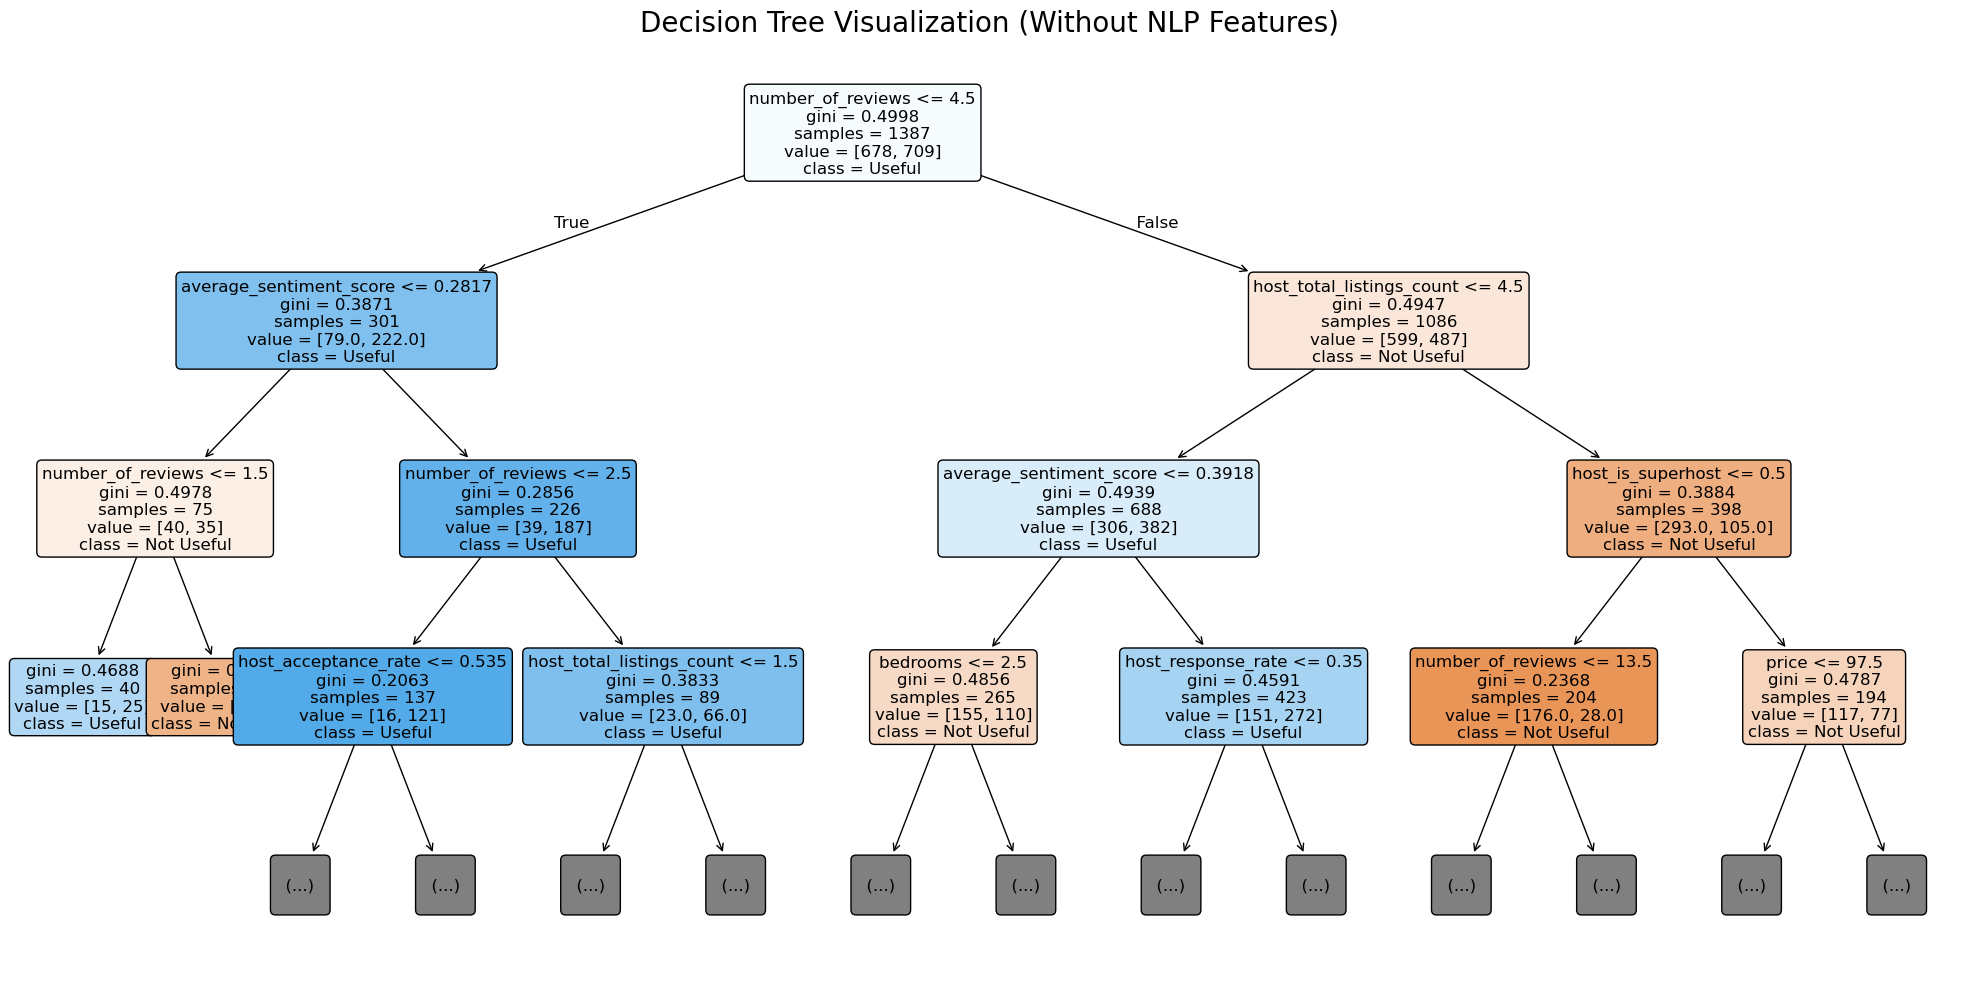

In [ ]:
plt.figure(figsize=(20, 10))

# Plot the Decision Tree using the best estimator from GridSearchCV
plot_tree(
    best_dtc_woNLP,
    feature_names=X_train_non_nlp_df_woNLP.columns,
    class_names=['Not Useful', 'Useful'],
    filled=True,
    impurity=True,
    rounded=True,
    fontsize=12,
    max_depth=3,
    proportion=False,
    precision=4
)

plt.title("Decision Tree Visualization (Without NLP Features)", fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
exclude_features_w_other_ratings = [
    'id', 'host_id', 'description', 'name', 'host_about', 'text', 'review_scores_rating',
]

# Select non-NLP features for training
non_nlp_features_w_other_ratings = [
    col for col in train_df.columns
    if col not in exclude_features_w_other_ratings and col != 'useful'
]

print("\nSelected Non-NLP Features for Modeling:")
print(non_nlp_features_w_other_ratings)

# Identify categorical and numerical features
categorical_features_w_other_ratings = ['neighbourhood', 'room_type', 'instant_bookable']
numerical_features_w_other_ratings = [
    col for col in non_nlp_features_w_other_ratings
    if col not in categorical_features_w_other_ratings + ['id', 'host_id']
]

# Define the ColumnTransformer with OneHotEncoder for categorical features
preprocessor_non_nlp_w_other_ratings = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features_w_other_ratings)
    ],
    remainder='passthrough'  # Keep the remaining features as-is
)

# Apply the transformations to the training and testing data
X_train_non_nlp_w_other_ratings = preprocessor_non_nlp_w_other_ratings.fit_transform(train_df[non_nlp_features_w_other_ratings])
X_test_non_nlp_w_other_ratings = preprocessor_non_nlp_w_other_ratings.transform(test_df[non_nlp_features_w_other_ratings])

# Retrieve feature names after OneHotEncoding
encoded_cat_features_non_nlp_w_other_ratings = preprocessor_non_nlp_w_other_ratings.named_transformers_['cat'].get_feature_names_out(categorical_features_w_other_ratings)
all_features_non_nlp_w_other_ratings = list(encoded_cat_features_non_nlp_w_other_ratings) + [
    col for col in non_nlp_features_w_other_ratings
    if col not in categorical_features_w_other_ratings
]

# Convert the transformed features back to a DataFrame
X_train_non_nlp_df_w_other_ratings = pd.DataFrame(
    X_train_non_nlp_w_other_ratings,
    columns=all_features_non_nlp_w_other_ratings,
    index=train_df.index
)
X_test_non_nlp_df_w_other_ratings = pd.DataFrame(
    X_test_non_nlp_w_other_ratings,
    columns=all_features_non_nlp_w_other_ratings,
    index=test_df.index
)

# Define the parameter grid for GridSearchCV
param_grid_tuned_woNLP = {
    'ccp_alpha': np.linspace(0, 0.001, 100),
    'min_samples_leaf': np.linspace(1, 50, 25).astype(int),
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV with DecisionTreeClassifier
grid_search_tuned_woNLP = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tuned_woNLP,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV on the training data
print("\nStarting Grid Search for Decision Tree (woNLP)...")
grid_search_tuned_woNLP.fit(X_train_non_nlp_df_w_other_ratings, y_train)

# Retrieve the best estimator
best_dtc_woNLP_1 = grid_search_tuned_woNLP.best_estimator_
print(f"\nBest Parameters: {grid_search_tuned_woNLP.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_tuned_woNLP.best_score_:.4f}")

# Predict on the test data using the best estimator
y_pred_woNLP = best_dtc_woNLP_1.predict(X_test_non_nlp_df_w_other_ratings)

# Evaluation Metrics for DTC_woNLP
cm_woNLP_w_other_ratings = confusion_matrix(y_test, y_pred_woNLP)
acc_woNLP_w_other_ratings = accuracy_score(y_test, y_pred_woNLP)
precision_woNLP_w_other_ratings = precision_score(y_test, y_pred_woNLP)
recall_woNLP_w_other_ratings = recall_score(y_test, y_pred_woNLP)

TN, FP, FN, TP = cm_woNLP_w_other_ratings.ravel()
TPR_woNLP_w_other_ratings = TP / (TP + FN)
FPR_woNLP_w_other_ratings = FP / (FP + TN)

print("\nDecision Tree Classifier Performance (woNLP) after Grid Search:")
print(f"Confusion Matrix:\n{cm_woNLP_w_other_ratings}")
print(f"Accuracy: {acc_woNLP_w_other_ratings:.4f}")
print(f"Precision: {precision_woNLP_w_other_ratings:.4f}")
print(f"Recall (TPR): {recall_woNLP_w_other_ratings:.4f}")
print(f"False Positive Rate (FPR): {FPR_woNLP_w_other_ratings:.4f}")



Selected Non-NLP Features for Modeling:
['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_identity_verified', 'neighbourhood', 'room_type', 'price', 'beds', 'bedrooms', 'bathrooms', 'instant_bookable', 'number_of_reviews', 'reviews_per_month', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'room_type_encoded', 'average_sentiment_score']

Starting Grid Search for Decision Tree (woNLP)...
Fitting 5 folds for each of 10000 candidates, totalling 50000 fits

Best Parameters: {'ccp_alpha': 0.0, 'max_depth': None, 'min_samples_leaf': 37}
Best Cross-Validation Accuracy: 0.8385

Decision Tree Classifier Performance (woNLP) after Grid Search:
Confusion Matrix:
[[249  36]
 [ 59 251]]
Accuracy: 0.8403
Precision: 0.8746
Recall (TPR): 0.8097
False Positive Rate (FPR): 0.1263


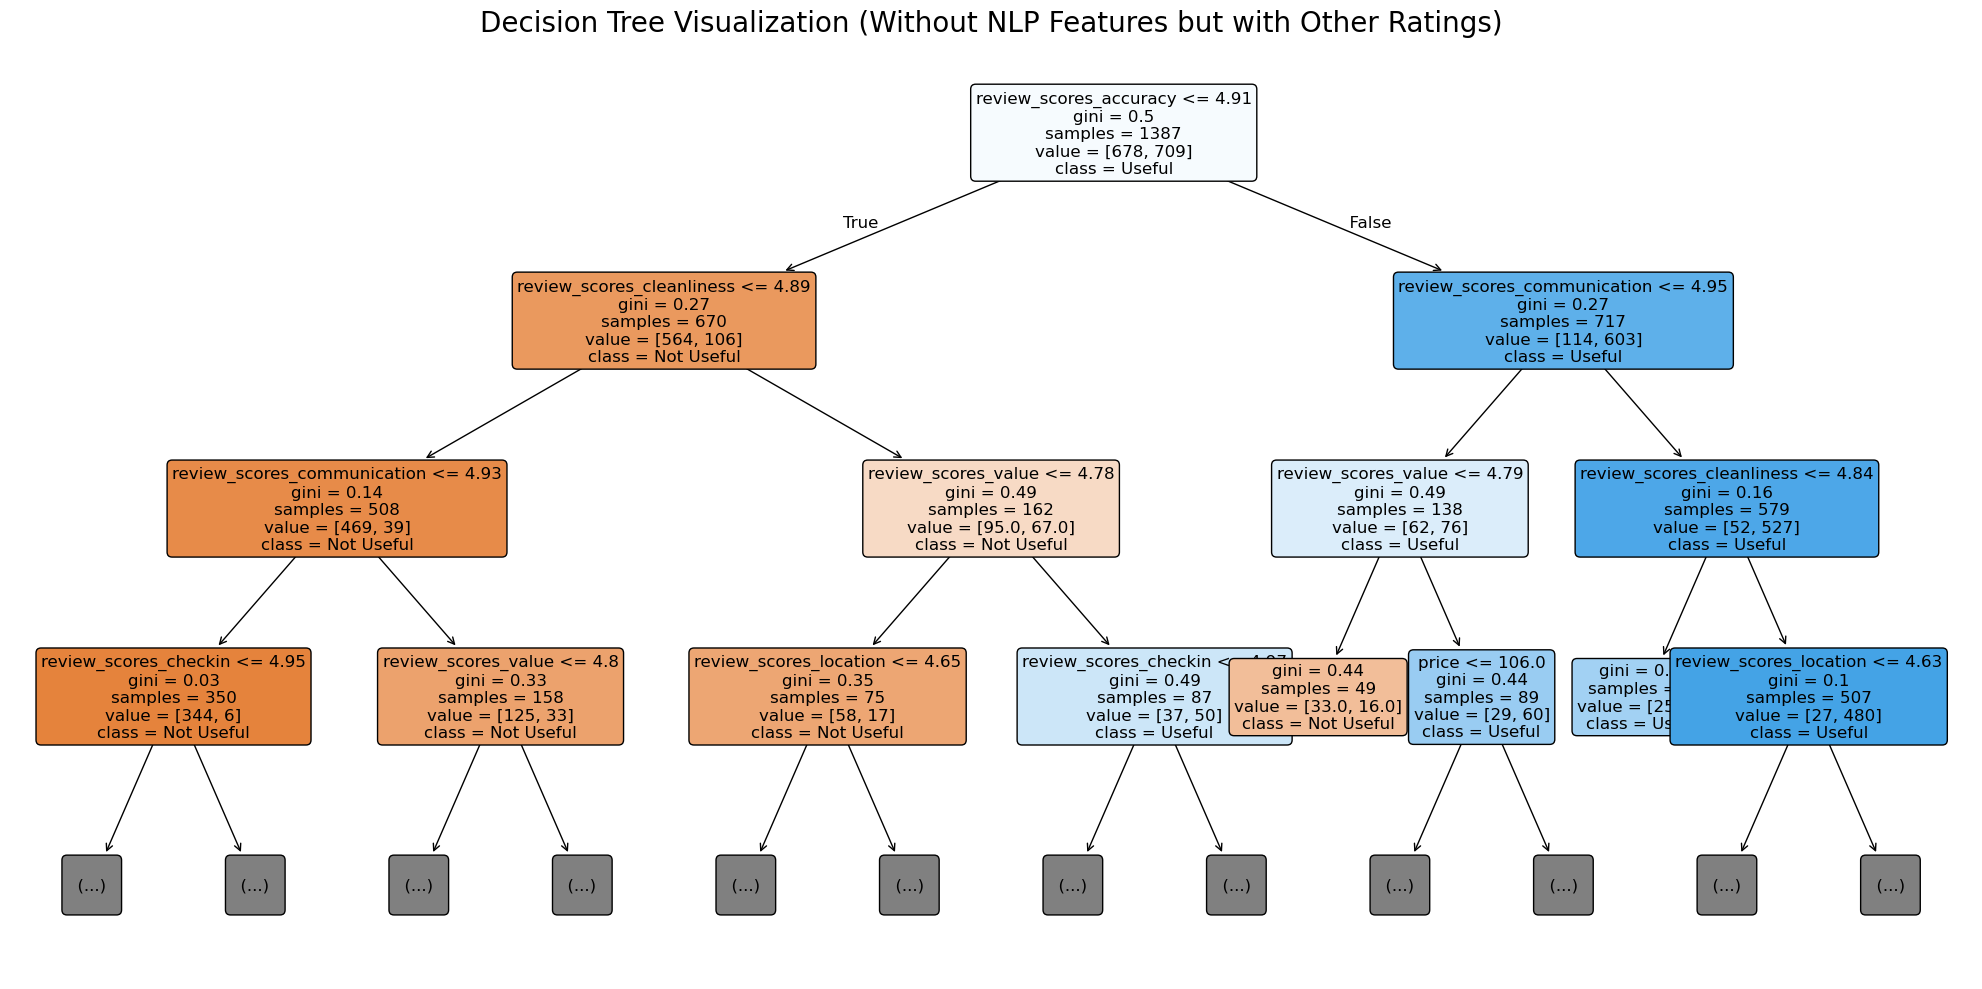

In [ ]:

plt.figure(figsize=(20, 10))

plot_tree(
    best_dtc_woNLP_1,
    feature_names=X_train_non_nlp_df_w_other_ratings.columns,
    class_names=['Not Useful', 'Useful'],
    filled=True,
    impurity=True,
    rounded=True,
    fontsize=12,
    max_depth=3,
    proportion=False,
    precision=2
)

plt.title("Decision Tree Visualization (Without NLP Features but with Other Ratings)", fontsize=20)
plt.tight_layout()
plt.show()



In [ ]:
comparison_data = {
    'Baseline DTC': [acc_initial, TPR_initial, FPR_initial, precision_initial],
    'DTC Tuned': [acc_tuned, TPR_tuned, FPR_tuned, precision_tuned],
    'DTC woNLP': [acc_woNLP, TPR_woNLP, FPR_woNLP, precision_woNLP],
    'DTC woNLP w/ other ratings': [acc_woNLP_w_other_ratings, TPR_woNLP_w_other_ratings, FPR_woNLP_w_other_ratings, precision_woNLP_w_other_ratings],
}

comparison_table = pd.DataFrame(
    data=comparison_data,
    index=['Accuracy', 'TPR', 'FPR', 'Precision']
).transpose()

comparison_table_styled = comparison_table.style.set_properties(**{'font-size': '12pt'}).set_table_styles([
    {'selector': 'th', 'props': [('font-size', '12pt')]}
])

print("\nComparison Table:")
display(comparison_table_styled)


Comparison Table:


,Accuracy,TPR,FPR,Precision
Baseline DTC,0.574790,0.561290,0.410526,0.597938
DTC Tuned,0.586555,0.445161,0.259649,0.650943
DTC woNLP,0.658824,0.600000,0.277193,0.701887
DTC woNLP w/ other ratings,0.840336,0.809677,0.126316,0.874564


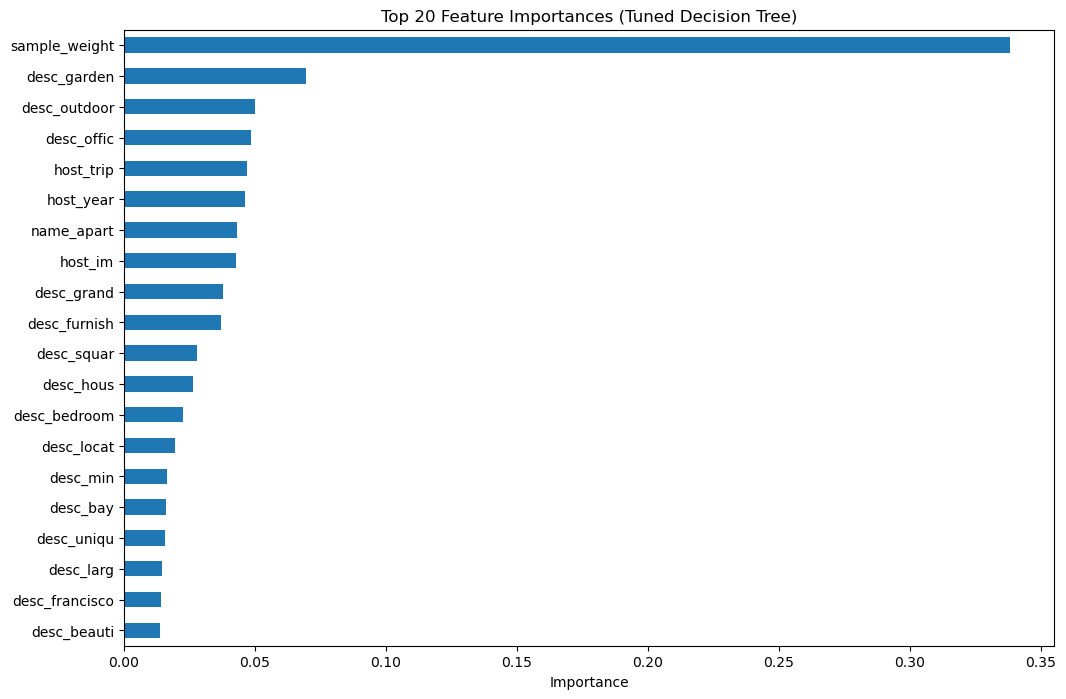

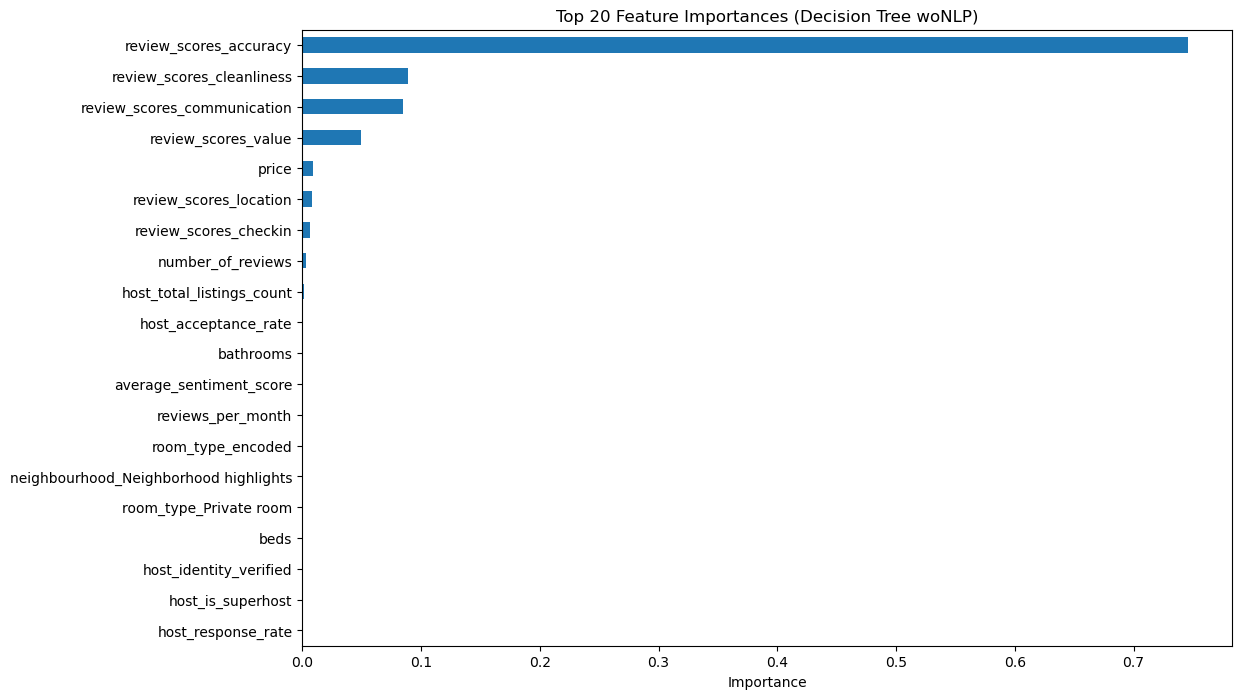

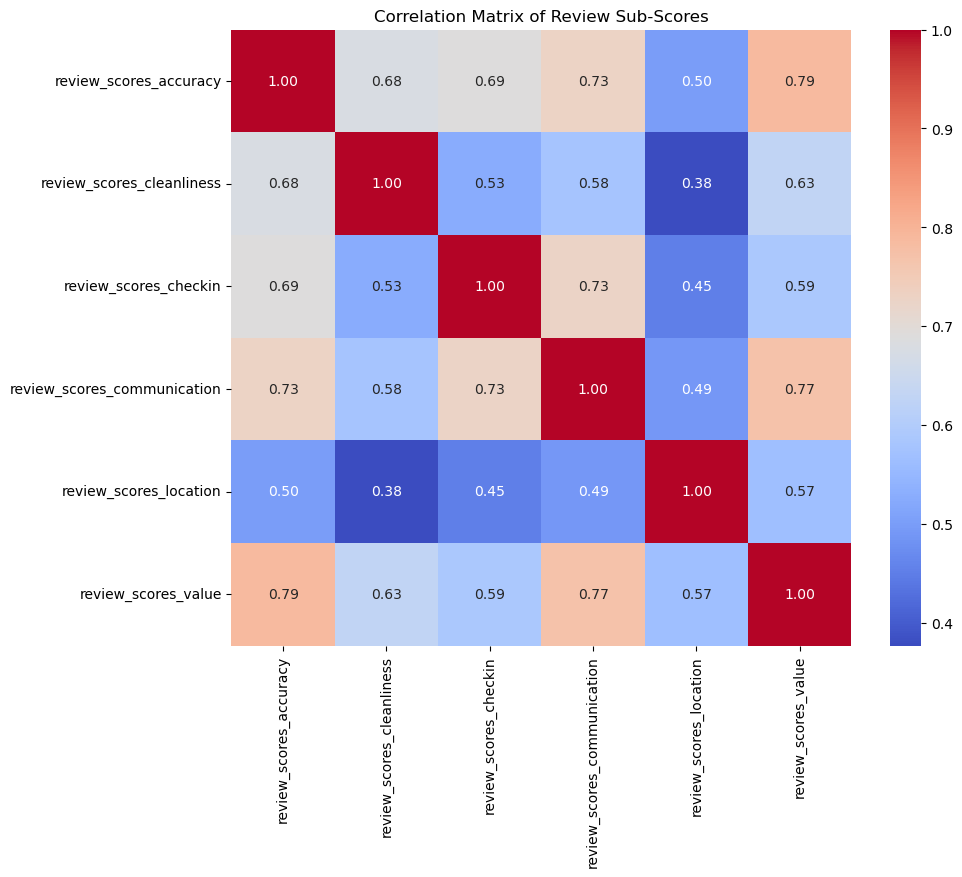

In [ ]:
# Feature Importances for DTC_Tuned
importances_tuned = dtc_tuned.feature_importances_
feature_names_tuned = dtm_train.columns
feature_importances_tuned = pd.Series(importances_tuned, index=feature_names_tuned).sort_values(ascending=False)

# Plot Feature Importances for DTC_Tuned
plt.figure(figsize=(12, 8))
feature_importances_tuned.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Tuned Decision Tree)")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()

# Feature Importances for DTC_woNLP
importances_woNLP = best_dtc_woNLP_1.feature_importances_
feature_names_woNLP = X_train_non_nlp_df_w_other_ratings.columns
feature_importances_woNLP_series = pd.Series(importances_woNLP, index=feature_names_woNLP).sort_values(ascending=False)

# Plot Feature Importances for DTC_woNLP
plt.figure(figsize=(12, 8))
feature_importances_woNLP_series.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Decision Tree woNLP)")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()

#Correlation Matrix of Review Sub-Scores
sub_scores = merged_listings[['review_scores_accuracy',
                              'review_scores_cleanliness',
                              'review_scores_checkin',
                              'review_scores_communication',
                              'review_scores_location',
                              'review_scores_value']]

corr_matrix = sub_scores.corr()

# print("\nCorrelation Matrix:")
# print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Review Sub-Scores")
plt.show()

# DTC Random forests and Boostings for data with ONLY FACT-based (merchant marked) factors

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer, f1_score


In [ ]:
def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)  # True Positive Rate (Recall)
    FPR = FP / (FP + TN)  # False Positive Rate

    return {
        'Confusion Matrix': cm,
        'Accuracy': acc,
        'Precision': precision,
        'Recall (TPR)': recall,
        'F1 Score': f1,
        'False Positive Rate (FPR)': FPR,
        'ROC AUC': roc_auc
    }


In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500], # 此项为速算
    # 'n_estimators': np.linspace(1, 500, 125).astype(int), # MacM1 runs for estimated 40 mins
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [None, 10, 20, 30]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',  # You can choose other metrics like 'roc_auc' if preferred
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_rf.fit((X_train_non_nlp_df_woNLP), y_train)

# Retrieve the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"\nBest Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Accuracy for Random Forest: {best_score_rf:.4f}")

# Initialize the RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_features=best_params_rf['max_features'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_depth=best_params_rf['max_depth'],
    random_state=42
)

# Train the tuned model
rf_best.fit(X_train_non_nlp_df_woNLP, y_train)

# Evaluate the tuned model
rf_best_metrics = evaluate_classifier(rf_best, X_test_non_nlp_df_woNLP, y_test)

# Display metrics
print("\nTuned Random Forest Classifier Performance:")
for metric, value in rf_best_metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 500}
Best Cross-Validation Accuracy for Random Forest: 0.7101

Tuned Random Forest Classifier Performance:
Confusion Matrix:
[[196  89]
 [ 85 225]]
Accuracy: 0.7076
Precision: 0.7166
Recall (TPR): 0.7258
F1 Score: 0.7212
False Positive Rate (FPR): 0.3123
ROC AUC: 0.7794


In [ ]:
# Get feature importances
importances_rf = rf_best.feature_importances_
feature_names_rf = X_train_non_nlp_df_woNLP.columns
feature_importances_rf = pd.Series(importances_rf, index=feature_names_rf).sort_values(ascending=False)

# Display top 20 features
# print("\nTop 20 Feature Importances (Random Forest):")
# print(feature_importances_rf.head(20))


## boosting

In [ ]:
# Check for missing values in training features
missing_train = X_train_non_nlp_df_woNLP.isnull().sum()
print("Missing values in Training Features:")
print(missing_train[missing_train > 0])

# Check for missing values in testing features
missing_test = X_test_non_nlp_df_woNLP.isnull().sum()
"""print("\nMissing values in Testing Features:")
print(missing_test[missing_test > 0])"""


from sklearn.impute import SimpleImputer

# Separate numerical and categorical features
numerical_features = X_train_non_nlp_df_woNLP.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train_non_nlp_df_woNLP.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize imputers
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical features in training data
X_train_non_nlp_df_woNLP[numerical_features] = numerical_imputer.fit_transform(X_train_non_nlp_df_woNLP[numerical_features])

# Impute categorical features in training data
if categorical_features:
    X_train_non_nlp_df_woNLP[categorical_features] = categorical_imputer.fit_transform(X_train_non_nlp_df_woNLP[categorical_features])

# Impute numerical features in testing data
X_test_non_nlp_df_woNLP[numerical_features] = numerical_imputer.transform(X_test_non_nlp_df_woNLP[numerical_features])

# Impute categorical features in testing data
if categorical_features:
    X_test_non_nlp_df_woNLP[categorical_features] = categorical_imputer.transform(X_test_non_nlp_df_woNLP[categorical_features])

# Verify that there are no missing values
"""print("\nAfter Imputation:")
print(f"Missing values in Training Features: {X_train_non_nlp_df.isnull().sum().sum()}")
print(f"Missing values in Testing Features: {X_test_non_nlp_df.isnull().sum().sum()}")"""

Missing values in Training Features:
host_response_rate      150
host_acceptance_rate     93
host_is_superhost        28
price                    85
beds                     80
bedrooms                 14
bathrooms                80
dtype: int64


'print("\nAfter Imputation:")\nprint(f"Missing values in Training Features: {X_train_non_nlp_df.isnull().sum().sum()}")\nprint(f"Missing values in Testing Features: {X_test_non_nlp_df.isnull().sum().sum()}")'

In [ ]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='accuracy',  # You can choose other metrics like 'roc_auc' if preferred
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_gb.fit(X_train_non_nlp_df_woNLP, y_train)

# Retrieve the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print(f"\nBest Parameters for Gradient Boosting: {best_params_gb}")
print(f"Best Cross-Validation Accuracy for Gradient Boosting: {best_score_gb:.4f}")

# Initialize the GradientBoostingClassifier with the best parameters
gb_best = GradientBoostingClassifier(
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    max_depth=best_params_gb['max_depth'],
    min_samples_leaf=best_params_gb['min_samples_leaf'],
    random_state=42
)

# Train the tuned model
gb_best.fit(X_train_non_nlp_df_woNLP, y_train)

# Evaluate the tuned model
gb_best_metrics = evaluate_classifier(gb_best, X_test_non_nlp_df_woNLP, y_test)

# Display metrics
print("\nTuned Gradient Boosting Classifier Performance:")
for metric, value in gb_best_metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy for Gradient Boosting: 0.7000

Tuned Gradient Boosting Classifier Performance:
Confusion Matrix:
[[191  94]
 [ 91 219]]
Accuracy: 0.6891
Precision: 0.6997
Recall (TPR): 0.7065
F1 Score: 0.7030
False Positive Rate (FPR): 0.3298
ROC AUC: 0.7769


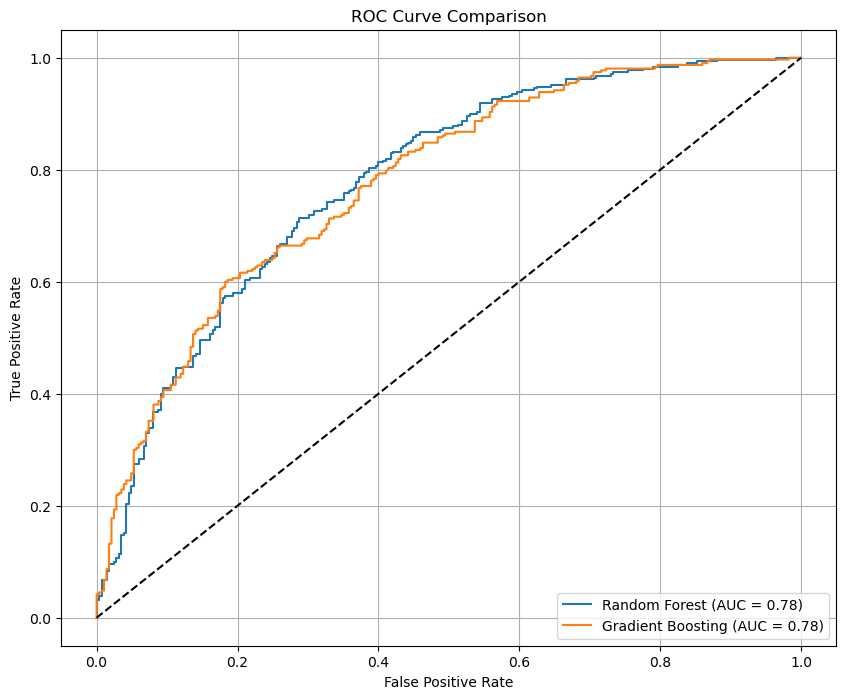

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 8))

# Random Forest ROC
y_proba_rf = rf_best.predict_proba(X_test_non_nlp_df_woNLP)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Gradient Boosting ROC
y_proba_gb = gb_best.predict_proba(X_test_non_nlp_df_woNLP)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# Create the comparison data dictionary
comparison_data = {
    'Random Forest': [
        f"{rf_best_metrics['Accuracy']:.4f}",
        f"{rf_best_metrics['Recall (TPR)']:.4f}",
        f"{rf_best_metrics['False Positive Rate (FPR)']:.4f}",
        f"{rf_best_metrics['Precision']:.4f}",
        f"{rf_best_metrics['ROC AUC']:.4f}"
    ],
    'Gradient Boosting': [
        f"{gb_best_metrics['Accuracy']:.4f}",
        f"{gb_best_metrics['Recall (TPR)']:.4f}",
        f"{gb_best_metrics['False Positive Rate (FPR)']:.4f}",
        f"{gb_best_metrics['Precision']:.4f}",
        f"{gb_best_metrics['ROC AUC']:.4f}"
    ]
}

# Define the index (metrics)
metrics_index = ['Accuracy', 'Recall (TPR)', 'False Positive Rate (FPR)', 'Precision', 'ROC AUC']

# Create the DataFrame
comparison_table = pd.DataFrame(
    data=comparison_data,
    index=metrics_index
).transpose()

# Style the table for better readability
comparison_table_styled = comparison_table.style.set_properties(**{'font-size': '12pt'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt')]}
    ])

# Display the table
print("\nComparison Table:")
display(comparison_table_styled)



Comparison Table:


,Accuracy,Recall (TPR),False Positive Rate (FPR),Precision,ROC AUC
Random Forest,0.7076,0.7258,0.3123,0.7166,0.7794
Gradient Boosting,0.6891,0.7065,0.3298,0.6997,0.7769


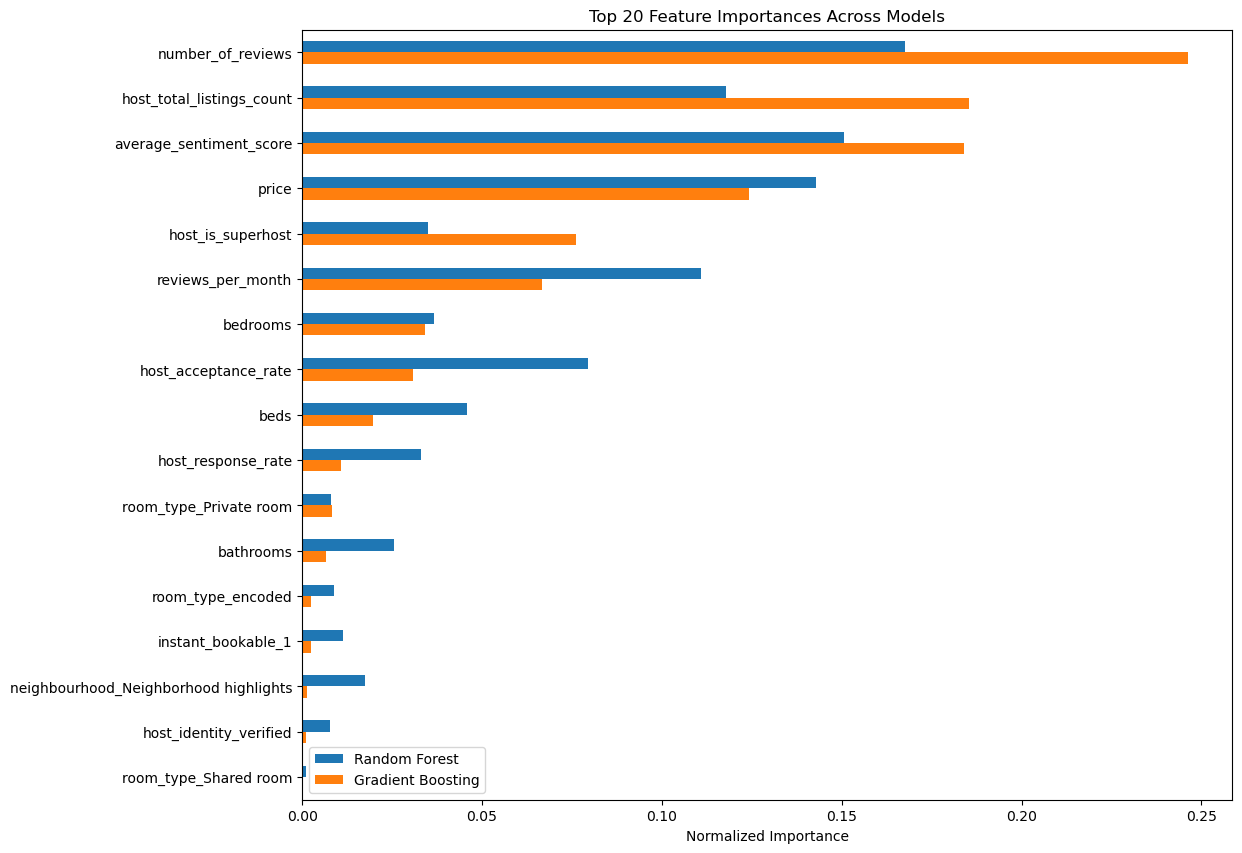

In [ ]:
# Combine feature importances into a single DataFrame
feature_importances_df = pd.DataFrame({
    'Random Forest': rf_best.feature_importances_,
    'Gradient Boosting': gb_best.feature_importances_
}, index=X_train_non_nlp_df_woNLP.columns)

# Normalize importances for better comparison
feature_importances_df = feature_importances_df.div(feature_importances_df.sum(axis=0), axis=1)

# Plot feature importances
feature_importances_df.sort_values(by='Gradient Boosting', ascending=False).head(20).plot(kind='barh', figsize=(12, 10))
plt.title("Top 20 Feature Importances Across Models")
plt.xlabel("Normalized Importance")
plt.gca().invert_yaxis()
plt.show()


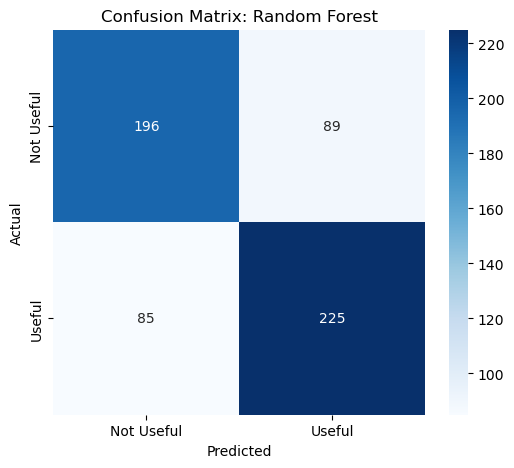

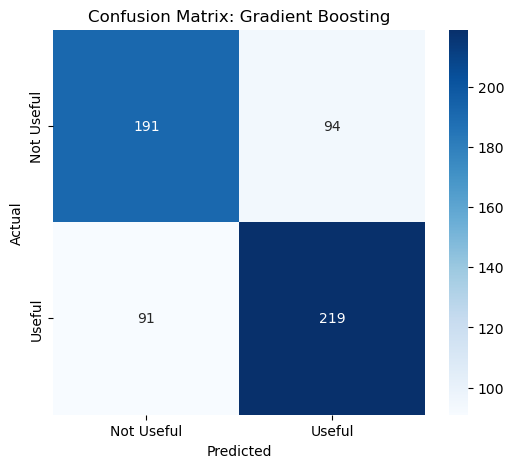

In [ ]:
import seaborn as sns

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Useful', 'Useful'], yticklabels=['Not Useful', 'Useful'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Plot for Random Forest
plot_confusion_matrix(rf_best_metrics['Confusion Matrix'], 'Random Forest')

# Plot for Gradient Boosting
plot_confusion_matrix(gb_best_metrics['Confusion Matrix'], 'Gradient Boosting')


# DTC Random forests and Boostings for data that INCLUDES other ratings

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score, f1_score

def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)  # True Positive Rate (Recall)
    FPR = FP / (FP + TN)  # False Positive Rate

    return {
        'Confusion Matrix': cm,
        'Accuracy': acc,
        'Precision': precision,
        'Recall (TPR)': recall,
        'F1 Score': f1,
        'False Positive Rate (FPR)': FPR,
        'ROC AUC': roc_auc
    }


In [ ]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical features
numerical_features = X_train_non_nlp_df_w_other_ratings.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train_non_nlp_df_w_other_ratings.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize imputers
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical features in training data
X_train_non_nlp_df_w_other_ratings[numerical_features] = numerical_imputer.fit_transform(X_train_non_nlp_df_w_other_ratings[numerical_features])

# Impute categorical features in training data
if categorical_features:
    X_train_non_nlp_df_w_other_ratings[categorical_features] = categorical_imputer.fit_transform(X_train_non_nlp_df_w_other_ratings[categorical_features])

# Impute numerical features in testing data
X_test_non_nlp_df_w_other_ratings[numerical_features] = numerical_imputer.transform(X_test_non_nlp_df_w_other_ratings[numerical_features])

# Impute categorical features in testing data
if categorical_features:
    X_test_non_nlp_df_w_other_ratings[categorical_features] = categorical_imputer.transform(X_test_non_nlp_df_w_other_ratings[categorical_features])

# Verify that there are no missing values
print("\nAfter Imputation:")
print(f"Missing values in Training Features: {X_train_non_nlp_df_w_other_ratings.isnull().sum().sum()}")
print(f"Missing values in Testing Features: {X_test_non_nlp_df_w_other_ratings.isnull().sum().sum()}")



After Imputation:
Missing values in Training Features: 0
Missing values in Testing Features: 0


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score, f1_score

def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)  # True Positive Rate (Recall)
    FPR = FP / (FP + TN)  # False Positive Rate

    return {
        'Confusion Matrix': cm,
        'Accuracy': acc,
        'Precision': precision,
        'Recall (TPR)': recall,
        'F1 Score': f1,
        'False Positive Rate (FPR)': FPR,
        'ROC AUC': roc_auc
    }


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
dtc = DecisionTreeClassifier(
    min_samples_leaf=5,
    ccp_alpha=0.001,
    random_state=42
)

# Train the model
dtc.fit(X_train_non_nlp_df_w_other_ratings, y_train)

# Evaluate the model
dtc_metrics = evaluate_classifier(dtc, X_test_non_nlp_df_w_other_ratings, y_test)

# Display metrics
print("Decision Tree Classifier Performance:")
for metric, value in dtc_metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")


Decision Tree Classifier Performance:
Confusion Matrix:
[[246  39]
 [ 56 254]]
Accuracy: 0.8403
Precision: 0.8669
Recall (TPR): 0.8194
F1 Score: 0.8425
False Positive Rate (FPR): 0.1368
ROC AUC: 0.9144


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    # 'n_estimators': np.linspace(1, 500, 125).astype(int), #定位 MacM1 runs for estimated 40 mins
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [None, 10, 20, 30]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',  # You can choose other metrics like 'roc_auc' if preferred
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train_non_nlp_df_w_other_ratings, y_train)

# Retrieve the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"\nBest Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Accuracy for Random Forest: {best_score_rf:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 500}
Best Cross-Validation Accuracy for Random Forest: 0.8674


In [ ]:
# Initialize the RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_features=best_params_rf['max_features'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_depth=best_params_rf['max_depth'],
    random_state=42
)

# Train the tuned model
rf_best.fit(X_train_non_nlp_df_w_other_ratings, y_train)

# Evaluate the tuned model
rf_best_metrics = evaluate_classifier(rf_best, X_test_non_nlp_df_w_other_ratings, y_test)

# Display metrics
print("\nTuned Random Forest Classifier Performance:")
for metric, value in rf_best_metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")



Tuned Random Forest Classifier Performance:
Confusion Matrix:
[[250  35]
 [ 46 264]]
Accuracy: 0.8639
Precision: 0.8829
Recall (TPR): 0.8516
F1 Score: 0.8670
False Positive Rate (FPR): 0.1228
ROC AUC: 0.9482


In [ ]:
# Get feature importances
importances_rf = rf_best.feature_importances_
feature_names_rf = X_train_non_nlp_df_w_other_ratings.columns
feature_importances_rf = pd.Series(importances_rf, index=feature_names_rf).sort_values(ascending=False)

"""# Display top 20 features
print("\nTop 20 Feature Importances (Random Forest):")
print(feature_importances_rf.head(20))

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances_rf.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()"""


'# Display top 20 features\nprint("\nTop 20 Feature Importances (Random Forest):")\nprint(feature_importances_rf.head(20))\n\n# Plot feature importances\nplt.figure(figsize=(12, 8))\nfeature_importances_rf.head(20).plot(kind=\'barh\')\nplt.title("Top 20 Feature Importances (Random Forest)")\nplt.xlabel("Importance Score")\nplt.gca().invert_yaxis()\nplt.show()'

## Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='accuracy',  # You can choose other metrics like 'roc_auc' if preferred
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_gb.fit(X_train_non_nlp_df_w_other_ratings, y_train)

# Retrieve the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print(f"\nBest Parameters for Gradient Boosting: {best_params_gb}")
print(f"Best Cross-Validation Accuracy for Gradient Boosting: {best_score_gb:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy for Gradient Boosting: 0.8609


In [ ]:
# Initialize the GradientBoostingClassifier with the best parameters
gb_best = GradientBoostingClassifier(
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    max_depth=best_params_gb['max_depth'],
    min_samples_leaf=best_params_gb['min_samples_leaf'],
    random_state=42
)

# Train the tuned model
gb_best.fit(X_train_non_nlp_df_w_other_ratings, y_train)

# Evaluate the tuned model
gb_best_metrics = evaluate_classifier(gb_best, X_test_non_nlp_df_w_other_ratings, y_test)

# Display metrics
print("\nTuned Gradient Boosting Classifier Performance:")
for metric, value in gb_best_metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")



Tuned Gradient Boosting Classifier Performance:
Confusion Matrix:
[[253  32]
 [ 45 265]]
Accuracy: 0.8706
Precision: 0.8923
Recall (TPR): 0.8548
F1 Score: 0.8731
False Positive Rate (FPR): 0.1123
ROC AUC: 0.9448


In [ ]:
# Get feature importances
importances_gb = gb_best.feature_importances_
feature_names_gb = X_train_non_nlp_df_w_other_ratings.columns
feature_importances_gb = pd.Series(importances_gb, index=feature_names_gb).sort_values(ascending=False)

"""# Display top 20 features
print("\nTop 20 Feature Importances (Gradient Boosting):")
print(feature_importances_gb.head(20))

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances_gb.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()"""


'# Display top 20 features\nprint("\nTop 20 Feature Importances (Gradient Boosting):")\nprint(feature_importances_gb.head(20))\n\n# Plot feature importances\nplt.figure(figsize=(12, 8))\nfeature_importances_gb.head(20).plot(kind=\'barh\')\nplt.title("Top 20 Feature Importances (Gradient Boosting)")\nplt.xlabel("Importance Score")\nplt.gca().invert_yaxis()\nplt.show()'

## Comparison

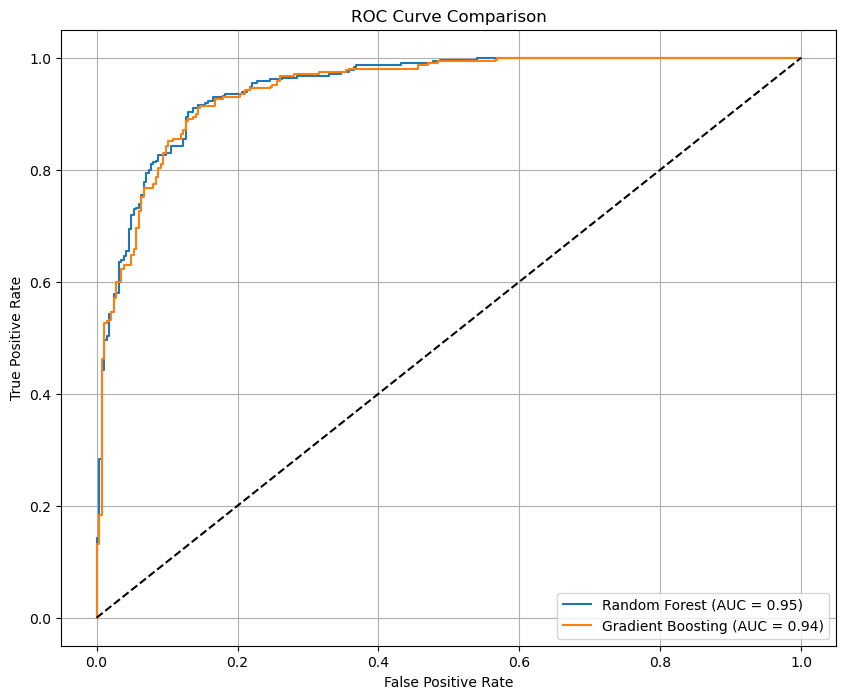

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 8))

# Random Forest ROC
y_proba_rf = rf_best.predict_proba(X_test_non_nlp_df_w_other_ratings)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Gradient Boosting ROC
y_proba_gb = gb_best.predict_proba(X_test_non_nlp_df_w_other_ratings)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# Create the comparison data dictionary
comparison_data = {
    'Random Forest': [
        f"{rf_best_metrics['Accuracy']:.4f}",
        f"{rf_best_metrics['Recall (TPR)']:.4f}",
        f"{rf_best_metrics['False Positive Rate (FPR)']:.4f}",
        f"{rf_best_metrics['Precision']:.4f}",
        f"{rf_best_metrics['ROC AUC']:.4f}"
    ],
    'Gradient Boosting': [
        f"{gb_best_metrics['Accuracy']:.4f}",
        f"{gb_best_metrics['Recall (TPR)']:.4f}",
        f"{gb_best_metrics['False Positive Rate (FPR)']:.4f}",
        f"{gb_best_metrics['Precision']:.4f}",
        f"{gb_best_metrics['ROC AUC']:.4f}"
    ]
}

# Define the index (metrics)
metrics_index = ['Accuracy', 'Recall (TPR)', 'False Positive Rate (FPR)', 'Precision', 'ROC AUC']

# Create the DataFrame
comparison_table = pd.DataFrame(
    data=comparison_data,
    index=metrics_index
).transpose()

# Style the table for better readability
comparison_table_styled = comparison_table.style.set_properties(**{'font-size': '12pt'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt')]}
    ])

# Display the table
print("\nComparison Table:")
display(comparison_table_styled)



Comparison Table:


,Accuracy,Recall (TPR),False Positive Rate (FPR),Precision,ROC AUC
Random Forest,0.8639,0.8516,0.1228,0.8829,0.9482
Gradient Boosting,0.8706,0.8548,0.1123,0.8923,0.9448


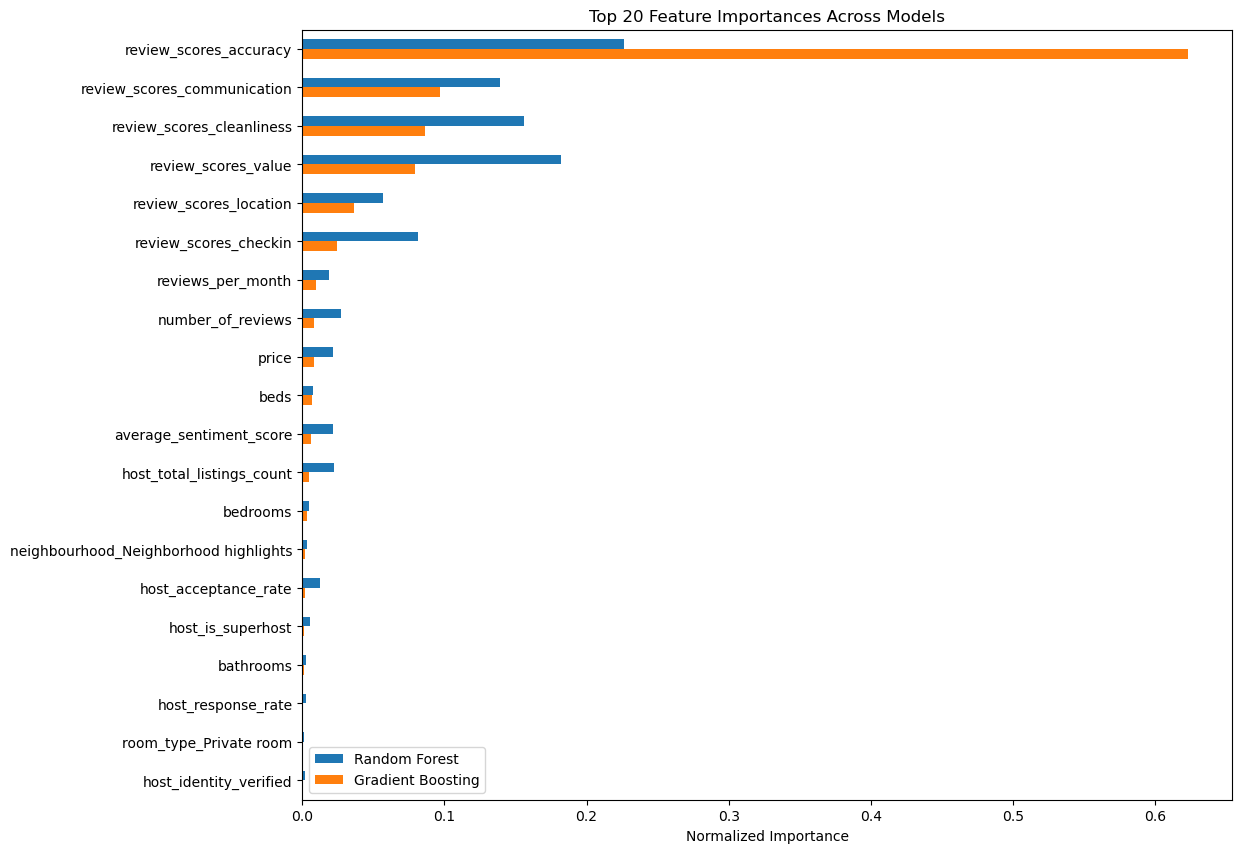

In [ ]:
# Combine feature importances into a single DataFrame
feature_importances_df = pd.DataFrame({
    'Random Forest': rf_best.feature_importances_,
    'Gradient Boosting': gb_best.feature_importances_
}, index=X_train_non_nlp_df_w_other_ratings.columns)

# Normalize importances for better comparison
feature_importances_df = feature_importances_df.div(feature_importances_df.sum(axis=0), axis=1)

# Plot feature importances
feature_importances_df.sort_values(by='Gradient Boosting', ascending=False).head(20).plot(kind='barh', figsize=(12, 10))
plt.title("Top 20 Feature Importances Across Models")
plt.xlabel("Normalized Importance")
plt.gca().invert_yaxis()
plt.show()


# Random forests and Boostings for logistic regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_curve, roc_auc_score, f1_score,
                             classification_report)
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
# Features and target
#print(X_train_non_nlp_df_w_other_ratings)
# Correct column selection using double square brackets
X_train = X_train_non_nlp_df_w_other_ratings[['number_of_reviews', 'reviews_per_month', 'review_scores_accuracy',
                                             'review_scores_cleanliness', 'review_scores_checkin',
                                             'review_scores_communication', 'review_scores_location',
                                             'review_scores_value']]

X_test = X_test_non_nlp_df_w_other_ratings[['number_of_reviews', 'reviews_per_month', 'review_scores_accuracy',
                                           'review_scores_cleanliness', 'review_scores_checkin',
                                           'review_scores_communication', 'review_scores_location',
                                           'review_scores_value']]
y_train = y_train
y_test = y_test

In [ ]:
# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)  # Assuming categorical features are already encoded
    ]
)

In [ ]:
# Create a Pipeline with preprocessing and Logistic Regression
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Define parameter grid
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']  # 'elasticnet' and 'none' can also be considered
}

# Initialize GridSearchCV
grid_search_logreg = GridSearchCV(
    estimator=pipeline_logreg,
    param_grid=param_grid_logreg,
    cv=5,                        # 5-fold cross-validation
    scoring='accuracy',          # You can choose other metrics like 'roc_auc'
    verbose=1,
    n_jobs=-1
)

In [ ]:
# Fit GridSearchCV
grid_search_logreg.fit(X_train, y_train)

# Retrieve best parameters and best score
best_params_logreg = grid_search_logreg.best_params_
best_score_logreg = grid_search_logreg.best_score_

print(f"\nBest Parameters for Logistic Regression: {best_params_logreg}")
print(f"Best Cross-Validation Accuracy for Logistic Regression: {best_score_logreg:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l1'}
Best Cross-Validation Accuracy for Logistic Regression: 0.8436


In [ ]:
# Initialize the LogisticRegression with best parameters
logreg_best = GridSearchCV(
    estimator=pipeline_logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
).fit(X_train, y_train).best_estimator_

# Alternatively, use the already fitted grid_search_logreg
logreg_best = grid_search_logreg.best_estimator_

# Evaluate the tuned model
def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)  # True Positive Rate (Recall)
    FPR = FP / (FP + TN)  # False Positive Rate

    return {
        'Confusion Matrix': cm,
        'Accuracy': acc,
        'Precision': precision,
        'Recall (TPR)': recall,
        'F1 Score': f1,
        'False Positive Rate (FPR)': FPR,
        'ROC AUC': roc_auc
    }

logreg_metrics = evaluate_classifier(logreg_best, X_test, y_test)

# Display metrics
print("\nTuned Logistic Regression Classifier Performance:")
for metric, value in logreg_metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Tuned Logistic Regression Classifier Performance:
Confusion Matrix:
[[240  45]
 [ 33 277]]
Accuracy: 0.8689
Precision: 0.8602
Recall (TPR): 0.8935
F1 Score: 0.8766
False Positive Rate (FPR): 0.1579
ROC AUC: 0.9306


In [ ]:
# Define Random Forest Pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid for Random Forest
param_grid_rf = {
    # 'classifier__n_estimators': [100, 200, 500],
    'classifier__n_estimators': np.linspace(1, 500, 20).astype(int),
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Retrieve best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"\nBest Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Accuracy for Random Forest: {best_score_rf:.4f}")

# Best Random Forest Model
rf_best = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model
rf_best_metrics = evaluate_classifier(rf_best, X_test, y_test)

# Display metrics
print("\nTuned Random Forest Classifier Performance:")
for metric, value in rf_best_metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")


Fitting 5 folds for each of 480 candidates, totalling 2400 fits

Best Parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 316}
Best Cross-Validation Accuracy for Random Forest: 0.8681

Tuned Random Forest Classifier Performance:
Confusion Matrix:
[[252  33]
 [ 41 269]]
Accuracy: 0.8756
Precision: 0.8907
Recall (TPR): 0.8677
F1 Score: 0.8791
False Positive Rate (FPR): 0.1158
ROC AUC: 0.9462


In [ ]:
# Define Gradient Boosting Pipeline
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    # 'classifier__n_estimators': [100, 200, 500],
    'classifier__n_estimators': np.linspace(1, 500, 20).astype(int),
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_leaf': [1, 2, 5]
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Retrieve best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print(f"\nBest Parameters for Gradient Boosting: {best_params_gb}")
print(f"Best Cross-Validation Accuracy for Gradient Boosting: {best_score_gb:.4f}")

# Best Gradient Boosting Model
gb_best = grid_search_gb.best_estimator_

# Evaluate the best Gradient Boosting model
gb_best_metrics = evaluate_classifier(gb_best, X_test, y_test)

# Display metrics
print("\nTuned Gradient Boosting Classifier Performance:")
for metric, value in gb_best_metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")


Fitting 5 folds for each of 540 candidates, totalling 2700 fits

Best Parameters for Gradient Boosting: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 27}
Best Cross-Validation Accuracy for Gradient Boosting: 0.8623

Tuned Gradient Boosting Classifier Performance:
Confusion Matrix:
[[252  33]
 [ 48 262]]
Accuracy: 0.8639
Precision: 0.8881
Recall (TPR): 0.8452
F1 Score: 0.8661
False Positive Rate (FPR): 0.1158
ROC AUC: 0.9411


In [ ]:
# Create the comparison data dictionary
comparison_data = {
    'Logistic Regression': [
        f"{logreg_metrics['Accuracy']:.4f}",
        f"{logreg_metrics['Recall (TPR)']:.4f}",
        f"{logreg_metrics['False Positive Rate (FPR)']:.4f}",
        f"{logreg_metrics['Precision']:.4f}",
        f"{logreg_metrics['ROC AUC']:.4f}"
    ],
    'Random Forest': [
        f"{rf_best_metrics['Accuracy']:.4f}",
        f"{rf_best_metrics['Recall (TPR)']:.4f}",
        f"{rf_best_metrics['False Positive Rate (FPR)']:.4f}",
        f"{rf_best_metrics['Precision']:.4f}",
        f"{rf_best_metrics['ROC AUC']:.4f}"
    ],
    'Gradient Boosting': [
        f"{gb_best_metrics['Accuracy']:.4f}",
        f"{gb_best_metrics['Recall (TPR)']:.4f}",
        f"{gb_best_metrics['False Positive Rate (FPR)']:.4f}",
        f"{gb_best_metrics['Precision']:.4f}",
        f"{gb_best_metrics['ROC AUC']:.4f}"
    ]
}

# Define the index (metrics)
metrics_index = ['Accuracy', 'Recall (TPR)', 'False Positive Rate (FPR)', 'Precision', 'ROC AUC']

# Create the DataFrame
comparison_table = pd.DataFrame(
    data=comparison_data,
    index=metrics_index
).transpose()

comparison_table_styled = comparison_table.style.set_properties(**{'font-size': '12pt'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt')]}
    ])

print("\nComparison Table:")
display(comparison_table_styled)



Comparison Table:


,Accuracy,Recall (TPR),False Positive Rate (FPR),Precision,ROC AUC
Logistic Regression,0.8689,0.8935,0.1579,0.8602,0.9306
Random Forest,0.8756,0.8677,0.1158,0.8907,0.9462
Gradient Boosting,0.8639,0.8452,0.1158,0.8881,0.9411
